## Data cleaning template for R modeling 

- added the new 200 data points from Prolific 2

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [2]:
# loading the csv file for the collected responses as of "date"

df = pd.read_csv('data\CO2-Rechner_February+27,+2024_20.14.csv', header = 0)

pd.set_option('display.max_columns', None)
df.head(9)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q2,Q1,Q2.1,Q3,Q4,Q5,Q6,Q7,Q1.1,Q3.1,Q4.1,Q5.1,Q7.1,Q8,Q9,Q11,Q12,Q13,Q15,Q16,Q17,Q19,Q20,Q21,Q1.2,Q1.3,Q1.4,Q2.2,Q3.2,Q4.2,Q1.5,Q2.3,Q4.3,Q5.2,Q6.1,Q3.3,Q1.6,Q2.4,Q3.4,Q4.4,Q2_1,Q2_2,Q2_4,Q2_5,Q8_14,Q2_1.1,Q2_2.1,Q2_4.1,Q1_1,Q1_2,Q1_3,Q1_5,Q2_2.2,Q2_4.2,Q2_6,Q2_7,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q3_8,Q3_9,Q3_10,Q3_11,Q3_12,Q4.5,Q5.3,Q1.7,Q1.8,Q2.5,Q3_1.1,Q3_2.1,Q3_3.1,Q3_4.1,Q3_5.1,Q3_6.1,Q3_7.1,Q3_8.1,Q4.6,Q5.4,m,Faktor_Haushaltsmitglieder,Faktor_Haustyp,Faktor_Baujahr,Faktor_Quadratmeter,Faktor_Heizungsart,CO2_Wohnen,CO2_Strom,CO2_Wohnen_Strom,CO2_ Kreuzfahrt,CO2_Flugreisen,Business_Europa,Business_Transkontinental,CO2_ÖPNV,CO2_Auto1,Faktor_Kraftstoff,Verbrauch,Faktor_Kraftstoff2,Verbrauch2,Jährliche_Fahrleistung,CO2_Auto2,Faktor_Kraftstoff3,Verbrauch3,Faktor_Kraftstoff4,Verbrauch4,Jährliche_Fahrleistung2,CO2_Auto3,Faktor_Kraftstoff5,Verbrauch5,Faktor_Kraftstoff6,Verbrauch6,Jährliche_Fahrleistung3,CO2_Auto4,Faktor_Kraftstoff7,Verbrauch7,Faktor_Kraftstoff8,Verbrauch8,Jährliche_Fahrleistung4,CO2_Auto5,Faktor_Kraftstoff9,Verbrauch9,Faktor_Kraftstoff10,Verbrauch10,Jährliche_Fahrleistung5,CO2_Auto_Gesamt,CO2_Mobilität,CO2_Ernährung,Faktor_Haushaltseinkommen,CO2_Sonstiger_Konsum,Öffentliche_emissionen,CO2_Gesamt,CO2_Tonnen,CO2_Tonnen_Gerundet,Einschätzung_Wohnen_Strom,Einschätzung_Mobilität,Einschätzung_Ernährung,Einschätzung_Sonstiger_Konsum,Einschätzung_Gesamt,CO2_Vergleichsperson,signal,sum_donations,Durchschnitt_Wohnen_Strom,Durchschnitt_Mobilität,Durchschnitt_Ernährung,Durchschnitt_Sonstiger_Konsum,Vergleich_Wohnen_Strom,Vergleich_Mobilität,Vergleich_Ernährung,Vergleich_Sonstiger_Konsum
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Sind Sie über 18 Jahre alt?,Wie viele Personen wohnen in Ihrem Haushalt?,Welchen Haustyp bewohnen Sie?,Baujahr bzw. Standard des Gebäudes in dem Sie ...,Auf wieviel Quadratmeter Wohnfläche wohnen Sie?,Womit wird die von Ihnen bewohnte Immobilie ge...,Haben Sie einen Ökostrom?,Wie hoch ist ihr Haushaltsstrom Jahresverbrauc...,Wie viele Autos besitzen Sie?,Was ist die primäre Kraftstoffart Ihres 1. Fah...,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 1. Fa...,Was ist die primäre Kraftstoffart Ihres 2. Fah...,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 2. Fa...,Was ist die primäre Kraftstoffart Ihres 3. Fah...,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 3. Fa...,Was ist die primäre Kraftstoffart Ihres 4. Fah...,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 4. Fa...,Was ist die primäre Kraftstoffart Ihres 5. Fah...,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 5. Fa...,Nutzen Sie öffentliche Verkehrsmittel?,Wie viele Tage im Jahr sind Sie auf Kreuzfahrt?,Wie viele Stunden im Jahr fliegen Sie innerhal...,Wie viele Stunden davon Business Class?,Wie viele Stunden im Jahr fliegen Sie transkon...,Wie viele Stunden davon Business Class oder Fi...,Was entspricht am ehesten Ihren Ernährungsgewo...,Wie oft kaufen Sie saisonale und regionale Pro...,Aktivitätslevel (Altag und Sport),Geschlecht,Alter,Körpergewicht (in kg),Was beschreibt Ihr Kaufverhalten am ehesten?,Was beschreibt Ihre Kaufkriterien am ehesten?,Wie oft kaufen sie Gebrauchtware?,Wie hoch ist Ihr monatliches Haushaltsnettoein...,"Bevor Sie mit Ihren Einschätzungen beginnen, b...","Bevor Sie mit Ihren Einschätzungen beginnen, b...","Bevor Sie mit Ihren Einschätzungen beginne

In [3]:
#old df_selected = df.iloc[1:, [25, 50, 51, 56, 61, 83, 86, 87, 88, 89, 90, 91, 92, 93, 95, 101, 102, 103, 104, 105, 108, 109, 115, 121, 127, 133, 139, 140, 141, 143, 144, 145]]

df_selected = df.iloc[2:, [25, 50, 51, 56, 87, 90, 91, 92, 93, 94, 95, 96, 97, 99, 106, 107, 108, 109, 110, 113, 114, 120, 126, 132, 138, 144, 145, 146, 148, 149, 150, 153, 154, 155, 156, 157]]

df_selected.head(10)

,Q1.1,Q5.2,Q6.1,Q4.4,Q1.7,Q3_1.1,Q3_2.1,Q3_3.1,Q3_4.1,Q3_5.1,Q3_6.1,Q3_7.1,Q3_8.1,Q5.4,CO2_Wohnen,CO2_Strom,CO2_Wohnen_Strom,CO2_ Kreuzfahrt,CO2_Flugreisen,CO2_ÖPNV,CO2_Auto1,CO2_Auto2,CO2_Auto3,CO2_Auto4,CO2_Auto5,CO2_Auto_Gesamt,CO2_Mobilität,CO2_Ernährung,CO2_Sonstiger_Konsum,Öffentliche_emissionen,CO2_Gesamt,Einschätzung_Wohnen_Strom,Einschätzung_Mobilität,Einschätzung_Ernährung,Einschätzung_Sonstiger_Konsum,Einschätzung_Gesamt
2,1,Männlich,36,2500,SPD,NaN,NaN,NaN,NaN,"Berufsausbildung, Lehre oder Ausbildung an ein...","(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,39106,1487.5,390,1877.5,0,3050,107.8,2149.092,0,0,0,0,2149.092,5306.892,2019.062639616,3766.1,1152,14121.554639616,35,45,70,NaN,73
3,1,Männlich,60,1000,Bündnis 90/Die Grünen,NaN,NaN,NaN,Allgemeine oder fachgebundene Hochschulreife/A...,NaN,NaN,NaN,NaN,30966,1400.4,39,1439.4,0,0,107.8,1074.546,0,0,0,0,1074.546,1182.346,1432.34549766,2311.806,1152,7517.89749766,100,81,86,NaN,80
4,2,Männlich,57,6500,7,NaN,NaN,NaN,NaN,"Berufsausbildung, Lehre oder Ausbildung an ein...",NaN,NaN,NaN,41812,1944,42,1986,0,0,107.8,927.505,1611.819,0,0,0,2539.324,2647.124,2268.581205,4345.5,1152,12399.205205,35,75,16,NaN,59
5,2,Männlich,36,6500,Bündnis 90/Die Grünen,NaN,NaN,NaN,NaN,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,17034,607.95,3.85,611.8,1897,2819.56,107.8,518.562,414.8496,0,0,0,933.4116,5757.7716,1542.849484968,2600.78175,1152,11665.202834968,88,79,78,NaN,87
6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.3076,26.32,90.6276,542,22042.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2,Männlich,31,2500,AfD,NaN,NaN,NaN,Allgemeine oder fachgebundene Hochschulreife/A...,NaN,NaN,NaN,NaN,78054,1539.17575,32.66666666666666666667,1571.84241666666666666667,6504,12466.36,107.8,0,640.614,0,0,0,640.614,19718.774,1989.363878304,1926.505,1152,26358.48529497066666666667,10,16,34,NaN,10
8,0,Weiblich,63,1500,7,NaN,NaN,Realschulabschluss (Mittlere Reife) oder gleic...,NaN,NaN,NaN,NaN,NaN,42369,2026.5,47.6,2074.1,0,0,107.8,0,0,0,0,0,0,107.8,1268.882554764,2091.634,1152,6694.416554764,76,62,55,NaN,30
9,1,Männlich,45,1500,CDU/CSU,NaN,NaN,Realschulabschluss (Mittlere Reife) oder gleic...,NaN,"Berufsausbildung, Lehre oder Ausbildung an ein...",NaN,NaN,NaN,01904,3024.864,429,3453.864,0,0,0,268.6365,0,0,0,0,268.6365,268.6365,2264.353344,2427.3963,1152,9566.250144,39,11,38,NaN,20
10,1,Weiblich,41,1900,7,NaN,NaN,Realschulabschluss (Mittlere Reife) oder gleic...,NaN,NaN,NaN,NaN,NaN,28237,1875.96,663,2538.96,0,266,107.8,1669.509,0,0,0,0,1669.509,2043.309,1305.892481256,2317.6,1152,9357.761481256,65,50,25,NaN,70
11,2,Weiblich,70,5400,Bündnis 90/Die Grünen,NaN,NaN,NaN,NaN,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,12209,2722.0275,42.7,2764.7275,0,931,0,1432.728,895.455,0,0,0,2328.183,3259.183,1259.6045137995,4117.9044375,1152,12553.4194512995,53,20,51,NaN,60


In [4]:
df_selected.columns.values

array(['Q1.1', 'Q5.2', 'Q6.1', 'Q4.4', 'Q1.7', 'Q3_1.1', 'Q3_2.1',
       'Q3_3.1', 'Q3_4.1', 'Q3_5.1', 'Q3_6.1', 'Q3_7.1', 'Q3_8.1', 'Q5.4',
       'CO2_Wohnen', 'CO2_Strom', 'CO2_Wohnen_Strom', 'CO2_ Kreuzfahrt',
       'CO2_Flugreisen', 'CO2_ÖPNV', 'CO2_Auto1', 'CO2_Auto2',
       'CO2_Auto3', 'CO2_Auto4', 'CO2_Auto5', 'CO2_Auto_Gesamt',
       'CO2_Mobilität', 'CO2_Ernährung', 'CO2_Sonstiger_Konsum',
       'Öffentliche_emissionen', 'CO2_Gesamt',
       'Einschätzung_Wohnen_Strom', 'Einschätzung_Mobilität',
       'Einschätzung_Ernährung', 'Einschätzung_Sonstiger_Konsum',
       'Einschätzung_Gesamt'], dtype=object)

In [5]:
# Rename the columns 

df_selected = df_selected.rename(columns={'Q1.1': 'no_cars', 'Q5.2': 'gender', 'Q6.1': 'age', 'Q4.4': 'income', 
       'Q1.7': 'political_party', 
       'Q3_1.1': 'education1', 'Q3_2.1': 'education2', 'Q3_3.1': 'education3',
       'Q3_4.1': 'education4', 'Q3_5.1': 'education5', 'Q3_6.1': 'education6', 'Q3_7.1': 'education7', 'Q3_8.1': 'education8', 
       'Q5.4': 'postal_code', 'CO2_Wohnen': 'CO2_housing', 'CO2_Strom' : 'CO2_electricity', 'CO2_Wohnen_Strom': 'CO2_housing_electricity', 
       'CO2_ Kreuzfahrt': 'CO2_cruise', 'CO2_Flugreisen': 'CO2_flight', 'CO2_ÖPNV': 'CO2_public_transport', 'CO2_Auto1': 'CO2_car1', 
       'CO2_Auto2' : 'CO2_car2',
       'CO2_Auto3' : 'CO2_car3', 'CO2_Auto4': 'CO2_car4', 'CO2_Auto5': 'CO2_car5', 'CO2_Auto_Gesamt' : 'CO2_car_total',
       'CO2_Mobilität': 'CO2_mobility', 'CO2_Ernährung': 'CO2_food', 'CO2_Sonstiger_Konsum': 'CO2_other_consumption',
       'Öffentliche_emissionen': 'public_emission', 'CO2_Gesamt': 'CO2_total', 
       'Einschätzung_Wohnen_Strom': 'belief_housing_electricity', 'Einschätzung_Mobilität': 'belief_mobility',
       'Einschätzung_Ernährung': 'belief_food', 'Einschätzung_Sonstiger_Konsum': 'belief_other_consumption', 'Einschätzung_Gesamt': 'belief_total'})


### 2nd dataset collected

In [6]:
#### load the dataset

df_prolific = pd.read_csv('data\Carbon+Beliefs+-+Prolific_March+10,+2024_14.10.csv', header = 0)

df_prolific.head(10)


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q2,Q1,Q1.1,Q2.1,Q3,Q4,Q5,Q6,Q7,Q1.2,Q3.1,Q4.1,Q5.1,Q6.1,Q8,Q9,Q10,Q11,Q13,Q14,Q15,Q16,Q18,Q19,Q20,Q21,Q23,Q24,Q25,Q26,Q1.3,Q1.4,Q1.5,Q2.2,Q3.2,Q4.2,Q1.6,Q2.3,Q3.3,Q4.3,Q5.2,Q6.2,Q1.7,Q2.4,Q3.4,Q4.4,Q2_1,Q2_2,Q2_4,Q2_5,Q8_14,Q9_1,Q9_2,Q9_3,Q1_1,Q1_2,Q1_3,Q1_5,Q2_2.1,Q2_4.1,Q2_6,Q2_7,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q3_8,Q3_9,Q3_10,Q3_11,Q3_12,Q4.5,Q5.3,Q6_4,Q1.8,Q1.9,Q2.5,Q3_1.1,Q3_2.1,Q3_3.1,Q3_4.1,Q3_5.1,Q3_6.1,Q3_7.1,Q3_8.1,Q4.6,Q5.4,Q6.3,PROLIFIC_PID,Faktor_Haushaltsmitglieder,Faktor_Haustyp,Faktor_Baujahr,Faktor_Quadratmeter,Faktor_Heizungsart,CO2_Wohnen,CO2_Strom,CO2_Wohnen_Strom,CO2_ Kreuzfahrt,CO2_Flugreisen,Business_Europa,Business_Transkontinental,CO2_ÖPNV,CO2_Auto1,Faktor_Kraftstoff,Verbrauch,Faktor_Kraftstoff2,Verbrauch2,Jährliche_Fahrleistung,CO2_Auto2,Faktor_Kraftstoff3,Verbrauch3,Faktor_Kraftstoff4,Verbrauch4,Jährliche_Fahrleistung2,CO2_Auto3,Faktor_Kraftstoff5,Verbrauch5,Faktor_Kraftstoff6,Verbrauch6,Jährliche_Fahrleistung3,CO2_Auto4,Faktor_Kraftstoff7,Verbrauch7,Faktor_Kraftstoff8,Verbrauch8,Jährliche_Fahrleistung4,CO2_Auto5,Faktor_Kraftstoff9,Verbrauch9,Faktor_Kraftstoff10,Verbrauch10,Jährliche_Fahrleistung5,CO2_Auto_Gesamt,CO2_Mobilität,CO2_Ernährung,Faktor_Haushaltseinkommen,CO2_Sonstiger_Konsum,Öffentliche_emissionen,CO2_Gesamt,CO2_Tonnen,CO2_Tonnen_Gerundet,Einschätzung_Wohnen_Strom,Einschätzung_Mobilität,Einschätzung_Ernährung,Einschätzung_Sonstiger_Konsum,Einschätzung_Gesamt,high_moral,CO2_Vergleichsperson_1,CO2_Vergleichsperson_2,signal,sum_donations,Durchschnitt_Wohnen_Strom,Durchschnitt_Mobilität,Durchschnitt_Ernährung,Durchschnitt_Sonstiger_Konsum,Vergleich_Wohnen_Strom,Vergleich_Mobilität,Vergleich_Ernährung,Vergleich_Sonstiger_Konsum
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Sind Sie über 18 Jahre alt?,Mit dieser Frage möchten wir Ihre Aufmerksamke...,Wie viele Personen wohnen in Ihrem Haushalt?,Welchen Haustyp bewohnen Sie?,"Baujahr bzw. Standard des Gebäudes, in dem Sie...",Auf wieviel Quadratmeter Wohnfläche wohnen Sie?,Womit wird die von Ihnen bewohnte Immobilie be...,Haben Sie einen Ökostromtarif?,Wie hoch ist ihr Haushaltsstrom Verbrauch in K...,Wie viele Autos besitzen Sie?,Was ist die primäre Kraftstoffart Ihres 1. Fah...,Ist Ihr 1. Fahrzeug ein Hybrid?,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 1. Fa...,Was ist die primäre Kraftstoffart Ihres 2. Fah...,Ist Ihr 2. Fahrzeug ein Hybrid?,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 2. Fa...,Was ist die primäre Kraftstoffart Ihres 3. Fah...,Ist Ihr 3. Fahrzeug ein Hybrid?,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 3. Fa...,Was ist die primäre Kraftstoffart Ihres 4. Fah...,Ist Ihr 4. Fahrzeug ein Hybrid?,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 4. Fa...,Was ist die primäre Kraftstoffart Ihres 5. Fah...,Ist Ihr 5. Fahrzeug ein Hybrid?,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 5. Fa...,Nutzen Sie öffentliche Verkehrsmittel?,Wie viele Tage im Jahr sind Sie auf Kreuzfahrt?,Wie viele Stunden im Jahr fliegen Sie innerhal...,Wie viele Stunden davon Business Class?,Wie viele Stunden im Jahr fliegen Sie transkon...,Wie viele Stunden davon Business Class oder Fi...,Was entspricht am ehesten Ihren Ernährungsgewo...,Wie oft kaufen Sie saisonale und regionale Pro...,Aktivitätslevel (Altag und Sport),Geschlecht,Alter,Körpergewicht (in kg),Was beschreibt Ihr Kaufverhal

In [7]:
# Select the columns with the variables of interests 

df_prolific = df_prolific.iloc[2:, [26, 56, 57, 62, 94, 97, 98, 99, 100, 101, 102, 103, 104, 106, 114, 115, 116, 117, 118, 121,
                                   122, 128, 134, 140, 146, 152, 153, 154, 156, 157, 158, 161, 162, 163, 164, 165]]
                                   

df_prolific.head(10)

,Q1.2,Q4.3,Q5.2,Q4.4,Q1.8,Q3_1.1,Q3_2.1,Q3_3.1,Q3_4.1,Q3_5.1,Q3_6.1,Q3_7.1,Q3_8.1,Q5.4,CO2_Wohnen,CO2_Strom,CO2_Wohnen_Strom,CO2_ Kreuzfahrt,CO2_Flugreisen,CO2_ÖPNV,CO2_Auto1,CO2_Auto2,CO2_Auto3,CO2_Auto4,CO2_Auto5,CO2_Auto_Gesamt,CO2_Mobilität,CO2_Ernährung,CO2_Sonstiger_Konsum,Öffentliche_emissionen,CO2_Gesamt,Einschätzung_Wohnen_Strom,Einschätzung_Mobilität,Einschätzung_Ernährung,Einschätzung_Sonstiger_Konsum,Einschätzung_Gesamt
2,2,Männlich,39,4000,Einer anderen Partei,NaN,NaN,NaN,NaN,"Berufsausbildung, Lehre oder Ausbildung an ein...",NaN,NaN,NaN,44329,1396.548,35,1431.548,0,1995,0,6492.535,1790.91,0,0,0,8283.445,10278.445,2280.3496786125,3041.85,1152,18184.1926786125,15,10,15,20,20
3,0,Männlich,38,5000,SPD,NaN,NaN,NaN,NaN,NaN,NaN,Doktorgrad oder Habilitation,NaN,76135,739.2503125,29.4,768.6503125,0,3394,107.8,0,0,0,0,0,0,3501.8,1486.8315,1372.6348125,1152,8281.916625,65,85,50,45,41
4,0,Männlich,45,2500,Bündnis 90/Die Grünen,NaN,NaN,NaN,NaN,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,55118,2501.28,47.6,2548.88,0,9824,107.8,0,0,0,0,0,0,9931.8,1939.5646116,3568.8505125,1152,19141.0951241,65,70,60,65,65
5,2,Männlich,22,4900,Bündnis Sarah Wagenknecht,NaN,NaN,NaN,Allgemeine oder fachgebundene Hochschulreife/A...,NaN,NaN,NaN,NaN,37124,840,32.66666666666666666667,872.66666666666666666667,0,6960,107.8,540.642,89.5455,0,0,0,630.1875,7697.9875,1698.41632092,2027.9,1152,13448.97048758666666666667,35,91,64,60,23
6,2,Männlich,33,5000,Einer anderen Partei,NaN,NaN,NaN,NaN,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,86641,1563.3,35,1598.3,0,4238,107.8,1296.405,777.843,0,0,0,2074.248,6420.048,1984.646961,2897,1152,14051.994961,63,55,37,72,36
7,0,Männlich,29,2100,Bündnis 90/Die Grünen,NaN,NaN,NaN,Allgemeine oder fachgebundene Hochschulreife/A...,NaN,NaN,NaN,NaN,12526,1256.1588,390,1646.1588,0,0,107.8,0,0,0,0,0,0,107.8,1352.10851776,1520.925,1152,5778.99231776,70,90,60,70,80
8,1,Männlich,28,3000,Bündnis 90/Die Grünen,NaN,NaN,NaN,NaN,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,50823,21.616,35,56.616,0,6077,107.8,129.6405,0,0,0,0,129.6405,6314.4405,1998.01590252,2897,1152,12418.07240252,40,53,64,59,26
9,0,Männlich,37,5000,AfD,NaN,NaN,Realschulabschluss (Mittlere Reife) oder gleic...,NaN,NaN,NaN,NaN,NaN,65795,7002,455,7457,0,0,107.8,0,0,0,0,0,0,107.8,2999.394288,2022.83025,1152,13739.024538,85,5,90,50,40
10,1,Männlich,43,1900,Einer anderen Partei,NaN,NaN,NaN,NaN,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,04275,1875.96,47.6,1923.56,0,0,0,112,0,0,0,0,112,112,1240.9217073,2311.806,1152,6740.2877073,70,60,90,85,75
11,1,Männlich,33,6000,FDP,NaN,NaN,NaN,NaN,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,50667,645.946875,30.8,676.746875,1897,11260,0,3581.82,0,0,0,0,3581.82,16738.82,2138.005275648,4334.63625,1152,25040.208400648,70,15,50,70,15


In [8]:
# rename the columns

df_prolific = df_prolific.rename(columns={'Q1.2':'no_cars', 'Q4.3':'gender', 'Q5.2':'age', 'Q4.4':'income', 'Q1.8':'political_party', 
                                          'Q3_1.1':'education1', 'Q3_2.1':'education2', 'Q3_3.1':'education3',
       'Q3_4.1':'education4', 'Q3_5.1':'education5', 'Q3_6.1':'education6', 'Q3_7.1':'education7', 'Q3_8.1':'education8', 
       'Q5.4':'postal_code', 'CO2_Wohnen':'CO2_housing',
       'CO2_Strom':'CO2_electricity', 'CO2_Wohnen_Strom':'CO2_housing_electricity', 'CO2_ Kreuzfahrt':'CO2_cruise', 'CO2_Flugreisen':'CO2_flight',
       'CO2_ÖPNV':'CO2_public_transport', 'CO2_Auto1':'CO2_car1', 'CO2_Auto2':'CO2_car2', 'CO2_Auto3':'CO2_car3', 'CO2_Auto4':'CO2_car4',
       'CO2_Auto5':'CO2_car5', 'CO2_Auto_Gesamt':'CO2_car_total', 'CO2_Mobilität':'CO2_mobility', 'CO2_Ernährung':'CO2_food',
       'CO2_Sonstiger_Konsum':'CO2_other_consumption', 'Öffentliche_emissionen':'public_emission', 'CO2_Gesamt':'CO2_total',
       'Einschätzung_Wohnen_Strom':'belief_housing_electricity', 'Einschätzung_Mobilität':'belief_mobility',
       'Einschätzung_Ernährung':'belief_food', 'Einschätzung_Sonstiger_Konsum':'belief_other_consumption',
       'Einschätzung_Gesamt':'belief_total'})


In [9]:
# Concatenating the two dataframes 

df_concat = pd.concat([df_selected, df_prolific], ignore_index=True)

df_concat.head()

,no_cars,gender,age,income,political_party,education1,education2,education3,education4,education5,education6,education7,education8,postal_code,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total
0,1,Männlich,36,2500,SPD,NaN,NaN,NaN,NaN,"Berufsausbildung, Lehre oder Ausbildung an ein...","(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,39106,1487.5,390,1877.5,0,3050,107.8,2149.092,0,0,0,0,2149.092,5306.892,2019.062639616,3766.1,1152,14121.554639616,35,45,70,NaN,73
1,1,Männlich,60,1000,Bündnis 90/Die Grünen,NaN,NaN,NaN,Allgemeine oder fachgebundene Hochschulreife/A...,NaN,NaN,NaN,NaN,30966,1400.4,39,1439.4,0,0,107.8,1074.546,0,0,0,0,1074.546,1182.346,1432.34549766,2311.806,1152,7517.89749766,100,81,86,NaN,80
2,2,Männlich,57,6500,7,NaN,NaN,NaN,NaN,"Berufsausbildung, Lehre oder Ausbildung an ein...",NaN,NaN,NaN,41812,1944,42,1986,0,0,107.8,927.505,1611.819,0,0,0,2539.324,2647.124,2268.581205,4345.5,1152,12399.205205,35,75,16,NaN,59
3,2,Männlich,36,6500,Bündnis 90/Die Grünen,NaN,NaN,NaN,NaN,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,17034,607.95,3.85,611.8,1897,2819.56,107.8,518.562,414.8496,0,0,0,933.4116,5757.7716,1542.849484968,2600.78175,1152,11665.202834968,88,79,78,NaN,87
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.3076,26.32,90.6276,542,22042.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### *Note 1: cleaning the education columns: 'education_clean'*

In [10]:
# function to clean the education columns: one highest degree remains

def clean_education(row):
    
    if (pd.notna(row['education8'])) and (pd.isna(row['education7'])) and (pd.isna(row['education6'])) and\
       (pd.isna(row['education5'])) and (pd.isna(row['education4'])) and (pd.isna(row['education3'])) and\
       (pd.isna(row['education2'])) and (pd.isna(row['education1'])):
            return 'Anderer Abschluss'
        
        
        
    elif (pd.notna(row['education7'])):
            return 'Doktorgrad oder Habilitation'

    elif (pd.isna(row['education7'])) and (pd.notna(row['education6'])):
            return '(Fach-) Hochschulabschluss (Bachelor, Master, Magister, Diplom, Staatsexamen)'
        
    elif (pd.isna(row['education7'])) and (pd.isna(row['education6'])) and\
         (pd.notna(row['education4'])):
            return 'Allgemeine oder fachgebundene Hochschulreife/Abitur (Gymnasium bzw. EOS)'
        
    elif (pd.isna(row['education7'])) and (pd.isna(row['education6'])) and\
      (pd.isna(row['education4'])) and (pd.notna(row['education5'])):
            return 'Berufsausbildung, Lehre oder Ausbildung an einer Fachschule'
        
    elif (pd.isna(row['education7'])) and (pd.isna(row['education6'])) and\
      (pd.isna(row['education4'])) and (pd.isna(row['education5'])) and (pd.notna(row['education3'])):
            return 'Realschulabschluss (Mittlere Reife) oder gleichwertiger Abschluss'
    
    elif (pd.isna(row['education7'])) and (pd.isna(row['education6'])) and\
        (pd.isna(row['education5'])) and (pd.isna(row['education4'])) and (pd.isna(row['education3'])) and\
        (pd.notna(row['education2'])):
            return 'Hauptschulabschluss (Volksschulabschluss) oder gleichwertiger Abschluss'
        
    elif (pd.isna(row['education7'])) and (pd.isna(row['education6'])) and\
      (pd.isna(row['education5'])) and (pd.isna(row['education4'])) and (pd.isna(row['education3'])) and\
        (pd.isna(row['education2'])) and (pd.notna(row['education1'])):
            return '(Noch) kein Abschluss'
    else: None
        

In [11]:
df_concat['education_clean'] = df_concat.apply(clean_education, axis=1)

In [12]:
df_concat = df_concat.drop(columns=['education1','education2', 'education3', 'education4', 'education5', 'education6','education7', 'education8',])

In [13]:
len(df_concat)

638

In [14]:
df_concat.head(10)

,no_cars,gender,age,income,political_party,postal_code,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,education_clean
0,1,Männlich,36,2500,SPD,39106,1487.5,390,1877.5,0,3050,107.8,2149.092,0,0,0,0,2149.092,5306.892,2019.062639616,3766.1,1152,14121.554639616,35,45,70,NaN,73,"(Fach-) Hochschulabschluss (Bachelor, Master, ..."
1,1,Männlich,60,1000,Bündnis 90/Die Grünen,30966,1400.4,39,1439.4,0,0,107.8,1074.546,0,0,0,0,1074.546,1182.346,1432.34549766,2311.806,1152,7517.89749766,100,81,86,NaN,80,Allgemeine oder fachgebundene Hochschulreife/A...
2,2,Männlich,57,6500,7,41812,1944,42,1986,0,0,107.8,927.505,1611.819,0,0,0,2539.324,2647.124,2268.581205,4345.5,1152,12399.205205,35,75,16,NaN,59,"Berufsausbildung, Lehre oder Ausbildung an ein..."
3,2,Männlich,36,6500,Bündnis 90/Die Grünen,17034,607.95,3.85,611.8,1897,2819.56,107.8,518.562,414.8496,0,0,0,933.4116,5757.7716,1542.849484968,2600.78175,1152,11665.202834968,88,79,78,NaN,87,"(Fach-) Hochschulabschluss (Bachelor, Master, ..."
4,1,NaN,NaN,NaN,NaN,NaN,64.3076,26.32,90.6276,542,22042.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
5,2,Männlich,31,2500,AfD,78054,1539.17575,32.66666666666666666667,1571.84241666666666666667,6504,12466.36,107.8,0,640.614,0,0,0,640.614,19718.774,1989.363878304,1926.505,1152,26358.48529497066666666667,10,16,34,NaN,10,Allgemeine oder fachgebundene Hochschulreife/A...
6,0,Weiblich,63,1500,7,42369,2026.5,47.6,2074.1,0,0,107.8,0,0,0,0,0,0,107.8,1268.882554764,2091.634,1152,6694.416554764,76,62,55,NaN,30,Realschulabschluss (Mittlere Reife) oder gleic...
7,1,Männlich,45,1500,CDU/CSU,01904,3024.864,429,3453.864,0,0,0,268.6365,0,0,0,0,268.6365,268.6365,2264.353344,2427.3963,1152,9566.250144,39,11,38,NaN,20,"Berufsausbildung, Lehre oder Ausbildung an ein..."
8,1,Weiblich,41,1900,7,28237,1875.96,663,2538.96,0,266,107.8,1669.509,0,0,0,0,1669.509,2043.309,1305.892481256,2317.6,1152,9357.761481256,65,50,25,NaN,70,Realschulabschluss (Mittlere Reife) oder gleic...
9,2,Weiblich,70,5400,Bündnis 90/Die Grünen,12209,2722.0275,42.7,2764.7275,0,931,0,1432.728,895.455,0,0,0,2328.183,3259.183,1259.6045137995,4117.9044375,1152,12553.4194512995,53,20,51,NaN,60,"(Fach-) Hochschulabschluss (Bachelor, Master, ..."


### 3rd dataset collected

In [15]:
#### load the dataset

df_prolific2 = pd.read_csv('data\Carbon+Beliefs+-+Prolific+V2_March+22,+2024_11.46.csv', header = 0)

df_prolific2.head(10)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q2,Q1,Q1.1,Q2.1,Q3,Q4,Q5,Q6,Q7,Q1.2,Q3.1,Q4.1,Q5.1,Q6.1,Q8,Q9,Q10,Q11,Q13,Q14,Q15,Q16,Q18,Q19,Q20,Q21,Q23,Q24,Q25,Q26,Q1.3,Q1.4,Q1.5,Q2.2,Q3.2,Q4.2,Q1.6,Q2.3,Q3.3,Q4.3,Q5.2,Q6.2,Q1.7,Q2.4,Q3.4,Q4.4,Q2_1,Q2_2,Q2_4,Q2_5,Q1.8,Q2_1.1,Q2_2.1,Q2_3,Q3.5,Q4_1,Q4_2,Q4_3,Q4_5,Q5_2,Q5_4,Q5_6,Q5_7,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q7.1,Q8.1,Q9.1,Q1.9,Q1.10,Q2.5,Q3.6,Q4.5,Q5.3,Q6.3,Q1.11,PROLIFIC_PID,Faktor_Haushaltsmitglieder,Faktor_Haustyp,Faktor_Baujahr,Faktor_Quadratmeter,Faktor_Heizungsart,CO2_Wohnen,CO2_Strom,CO2_Wohnen_Strom,CO2_ Kreuzfahrt,CO2_Flugreisen,Business_Europa,Business_Transkontinental,CO2_ÖPNV,CO2_Auto1,Faktor_Kraftstoff,Verbrauch,Faktor_Kraftstoff2,Verbrauch2,Jährliche_Fahrleistung,CO2_Auto2,Faktor_Kraftstoff3,Verbrauch3,Faktor_Kraftstoff4,Verbrauch4,Jährliche_Fahrleistung2,CO2_Auto3,Faktor_Kraftstoff5,Verbrauch5,Faktor_Kraftstoff6,Verbrauch6,Jährliche_Fahrleistung3,CO2_Auto4,Faktor_Kraftstoff7,Verbrauch7,Faktor_Kraftstoff8,Verbrauch8,Jährliche_Fahrleistung4,CO2_Auto5,Faktor_Kraftstoff9,Verbrauch9,Faktor_Kraftstoff10,Verbrauch10,Jährliche_Fahrleistung5,CO2_Auto_Gesamt,CO2_Mobilität,CO2_Ernährung,Faktor_Haushaltseinkommen,CO2_Sonstiger_Konsum,Öffentliche_emissionen,CO2_Gesamt,CO2_Tonnen,CO2_Tonnen_Gerundet,Einschätzung_Wohnen_Strom,Einschätzung_Mobilität,Einschätzung_Ernährung,Einschätzung_Sonstiger_Konsum,Einschätzung_Gesamt_1,Einschätzung_Gesamt_2,CO2_Spende,CO2_Vergleichsperson_1,CO2_Vergleichsperson_2,signal,Treatment,Durchschnitt_Wohnen_Strom,Durchschnitt_Mobilität,Durchschnitt_Ernährung,Durchschnitt_Sonstiger_Konsum,Vergleich_Wohnen_Strom,Vergleich_Mobilität,Vergleich_Ernährung,Vergleich_Sonstiger_Konsum
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Sind Sie über 18 Jahre alt?,Mit dieser Frage möchten wir Ihre Aufmerksamke...,Wie viele Personen wohnen in Ihrem Haushalt?,Welchen Haustyp bewohnen Sie?,"Baujahr bzw. Standard des Gebäudes, in dem Sie...",Auf wie viel Quadratmeter Wohnfläche wohnen Sie?,Womit wird die von Ihnen bewohnte Immobilie be...,Haben Sie einen Ökostromtarif?,Wie hoch ist ihr Haushaltsstrom Verbrauch in K...,Wie viele Autos besitzen Sie?,Was ist die primäre Kraftstoffart Ihres 1. Fah...,Ist Ihr 1. Fahrzeug ein Hybrid?,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 1. Fa...,Was ist die primäre Kraftstoffart Ihres 2. Fah...,Ist Ihr 2. Fahrzeug ein Hybrid?,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 2. Fa...,Was ist die primäre Kraftstoffart Ihres 3. Fah...,Ist Ihr 3. Fahrzeug ein Hybrid?,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 3. Fa...,Was ist die primäre Kraftstoffart Ihres 4. Fah...,Ist Ihr 4. Fahrzeug ein Hybrid?,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 4. Fa...,Was ist die primäre Kraftstoffart Ihres 5. Fah...,Ist Ihr 5. Fahrzeug ein Hybrid?,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 5. Fa...,Nutzen Sie öffentliche Verkehrsmittel?,Wie viele Tage im Jahr sind Sie auf Kreuzfahrt?,Wie viele Stunden im Jahr fliegen Sie innerhal...,Wie viele Stunden davon Business Class?,Wie viele Stunden im Jahr fliegen Sie transkon...,Wie viele Stunden davon Business Class?,Was entspricht am ehesten Ihren Ernährungsgewo...,Wie oft kaufen Sie saisonale und regionale Pro...,Aktivitätslevel (Altag und Sport),Geschlecht,Alter,Körpergewicht (in kg),Was beschreibt Ihr Kaufverhalten am ehesten?,Was beschreib

In [16]:
df_prolific2 = df_prolific2.iloc[2:, [26, 56, 57, 62, 95, 98, 100, 109, 110, 111, 112, 113,
                                         116, 117, 123, 129, 135, 141, 147, 148, 149, 151, 152, 153, 156, 157, 158, 159, 161]]
                                   
df_prolific2.head(3)

,Q1.2,Q4.3,Q5.2,Q4.4,Q1.9,Q3.6,Q5.3,CO2_Wohnen,CO2_Strom,CO2_Wohnen_Strom,CO2_ Kreuzfahrt,CO2_Flugreisen,CO2_ÖPNV,CO2_Auto1,CO2_Auto2,CO2_Auto3,CO2_Auto4,CO2_Auto5,CO2_Auto_Gesamt,CO2_Mobilität,CO2_Ernährung,CO2_Sonstiger_Konsum,Öffentliche_emissionen,CO2_Gesamt,Einschätzung_Wohnen_Strom,Einschätzung_Mobilität,Einschätzung_Ernährung,Einschätzung_Sonstiger_Konsum,Einschätzung_Gesamt_2
2,1,Männlich,40,8000,CDU/CSU,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",80803,1737,780,2517,0,76739,107.8,3111.372,0,0,0,0,3111.372,79958.172,2924.30424,6083.7,1152,92635.17624,40,60,75,35,92
3,1,Weiblich,22,1200,Bündnis Sarah Wagenknecht,Allgemeine oder fachgebundene Hochschulreife/A...,06406,2251.152,663,2914.152,0,1995,107.8,2592.81,0,0,0,0,2592.81,4695.61,1392.35478756,2317.6,1152,12471.71678756,59,42,44,41,33
4,0,Männlich,23,530,Bündnis 90/Die Grünen,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",76131,340.452,663,1003.452,0,1995,107.8,0,0,0,0,0,0,2102.8,2330.778259392,2433.48,1152,9022.510259392,65,16,59,38,74


In [17]:
df_prolific2.columns

Index(['Q1.2', 'Q4.3', 'Q5.2', 'Q4.4', 'Q1.9', 'Q3.6', 'Q5.3', 'CO2_Wohnen',
       'CO2_Strom', 'CO2_Wohnen_Strom', 'CO2_ Kreuzfahrt', 'CO2_Flugreisen',
       'CO2_ÖPNV', 'CO2_Auto1', 'CO2_Auto2', 'CO2_Auto3', 'CO2_Auto4',
       'CO2_Auto5', 'CO2_Auto_Gesamt', 'CO2_Mobilität', 'CO2_Ernährung',
       'CO2_Sonstiger_Konsum', 'Öffentliche_emissionen', 'CO2_Gesamt',
       'Einschätzung_Wohnen_Strom', 'Einschätzung_Mobilität',
       'Einschätzung_Ernährung', 'Einschätzung_Sonstiger_Konsum',
       'Einschätzung_Gesamt_2'],
      dtype='object')

In [18]:
# recalculating the Einschätzung values to no. of people with CO2 footprint "higher than" the respondent's
# 100 people including the respondent 

belief_columns = ['Einschätzung_Wohnen_Strom', 'Einschätzung_Mobilität','Einschätzung_Ernährung', 'Einschätzung_Sonstiger_Konsum',
       'Einschätzung_Gesamt_2']

for col in belief_columns: 
    df_prolific2[col] = df_prolific2[col].astype('float')
    df_prolific2[col] = 100 - df_prolific2[col] 


In [19]:
df_prolific2 = df_prolific2.rename(columns={'Q1.2':'no_cars', 'Q4.3':'gender', 'Q5.2':'age', 'Q4.4':'income', 'Q1.9':'political_party', 
                                           'Q3.6': 'education_clean', 'Q5.3': 'postal_code', 'CO2_Wohnen': 'CO2_housing',
       'CO2_Strom': 'CO2_electricity', 'CO2_Wohnen_Strom': 'CO2_housing_electricity', 'CO2_ Kreuzfahrt': 'CO2_cruise' , 
                                           'CO2_Flugreisen': 'CO2_flight', 'CO2_ÖPNV': 'CO2_public_transport', 'CO2_Auto1': 'CO2_car1', 
                                           'CO2_Auto2': 'CO2_car2', 'CO2_Auto3':'CO2_car3', 'CO2_Auto4': 'CO2_car4',
       'CO2_Auto5':'CO2_car5', 'CO2_Auto_Gesamt':'CO2_car_total', 'CO2_Mobilität':'CO2_mobility', 'CO2_Ernährung':'CO2_food',
       'CO2_Sonstiger_Konsum':'CO2_other_consumption', 'Öffentliche_emissionen':'public_emission', 'CO2_Gesamt':'CO2_total',
       'Einschätzung_Wohnen_Strom':'belief_housing_electricity', 'Einschätzung_Mobilität':'belief_mobility',
       'Einschätzung_Ernährung':'belief_food', 'Einschätzung_Sonstiger_Konsum':'belief_other_consumption',
       'Einschätzung_Gesamt_2':'belief_total'})

In [20]:
# unioning the 3rd dataset 
df_concat = pd.concat([df_concat, df_prolific2], ignore_index=True)
len(df_concat)

839

In [21]:
df_concat.head()

,no_cars,gender,age,income,political_party,postal_code,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,education_clean
0,1,Männlich,36,2500,SPD,39106,1487.5,390,1877.5,0,3050,107.8,2149.092,0,0,0,0,2149.092,5306.892,2019.062639616,3766.1,1152,14121.554639616,35,45,70,NaN,73,"(Fach-) Hochschulabschluss (Bachelor, Master, ..."
1,1,Männlich,60,1000,Bündnis 90/Die Grünen,30966,1400.4,39,1439.4,0,0,107.8,1074.546,0,0,0,0,1074.546,1182.346,1432.34549766,2311.806,1152,7517.89749766,100,81,86,NaN,80,Allgemeine oder fachgebundene Hochschulreife/A...
2,2,Männlich,57,6500,7,41812,1944,42,1986,0,0,107.8,927.505,1611.819,0,0,0,2539.324,2647.124,2268.581205,4345.5,1152,12399.205205,35,75,16,NaN,59,"Berufsausbildung, Lehre oder Ausbildung an ein..."
3,2,Männlich,36,6500,Bündnis 90/Die Grünen,17034,607.95,3.85,611.8,1897,2819.56,107.8,518.562,414.8496,0,0,0,933.4116,5757.7716,1542.849484968,2600.78175,1152,11665.202834968,88,79,78,NaN,87,"(Fach-) Hochschulabschluss (Bachelor, Master, ..."
4,1,NaN,NaN,NaN,NaN,NaN,64.3076,26.32,90.6276,542,22042.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


### *Note 2: mapping urban/rural classifications with the PLZ column*

In [22]:
### loading the cleaned urban/rural classification table - EUROSTAT 

df_urban_class = pd.read_csv('classification_urban_by_postal_code.csv', encoding='cp1252')
df_urban_class.head()

,Unnamed: 0,NUTS3_ID,NUTS1_NAME,NUTS2_NAME,NUTS3_NAME,POSTAL_CODE,CLASSIFICATION
0,0,DEA1D,Nordrhein-Westfalen,Düsseldorf,Rhein-Kreis Neuss,41363,PU
1,1,DEA1E,Nordrhein-Westfalen,Düsseldorf,Viersen,41366,PU
2,2,DEA1E,Nordrhein-Westfalen,Düsseldorf,Viersen,41748,PU
3,3,DEA1E,Nordrhein-Westfalen,Düsseldorf,Viersen,41749,PU
4,4,DEA1E,Nordrhein-Westfalen,Düsseldorf,Viersen,41751,PU


In [23]:
# change the datatype and join the classification table 

df_urban_class['POSTAL_CODE'] = df_urban_class['POSTAL_CODE'].astype('str')
df_final = pd.merge(df_concat, df_urban_class, left_on = ['postal_code'], right_on = ['POSTAL_CODE'], how = 'left')
df_final.head()

,no_cars,gender,age,income,political_party,postal_code,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,education_clean,Unnamed: 0,NUTS3_ID,NUTS1_NAME,NUTS2_NAME,NUTS3_NAME,POSTAL_CODE,CLASSIFICATION
0,1,Männlich,36,2500,SPD,39106,1487.5,390,1877.5,0,3050,107.8,2149.092,0,0,0,0,2149.092,5306.892,2019.062639616,3766.1,1152,14121.554639616,35,45,70,NaN,73,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",3269.0,DEE03,Sachsen-Anhalt,Sachsen-Anhalt,"Magdeburg, Kreisfreie Stadt",39106,IN
1,1,Männlich,60,1000,Bündnis 90/Die Grünen,30966,1400.4,39,1439.4,0,0,107.8,1074.546,0,0,0,0,1074.546,1182.346,1432.34549766,2311.806,1152,7517.89749766,100,81,86,NaN,80,Allgemeine oder fachgebundene Hochschulreife/A...,2928.0,DE929,Niedersachsen,Hannover,Region Hannover,30966,PU
2,2,Männlich,57,6500,7,41812,1944,42,1986,0,0,107.8,927.505,1611.819,0,0,0,2539.324,2647.124,2268.581205,4345.5,1152,12399.205205,35,75,16,NaN,59,"Berufsausbildung, Lehre oder Ausbildung an ein...",5030.0,DEA29,Nordrhein-Westfalen,Köln,Heinsberg,41812,PU
3,2,Männlich,36,6500,Bündnis 90/Die Grünen,17034,607.95,3.85,611.8,1897,2819.56,107.8,518.562,414.8496,0,0,0,933.4116,5757.7716,1542.849484968,2600.78175,1152,11665.202834968,88,79,78,NaN,87,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,NaN,NaN,NaN,NaN,64.3076,26.32,90.6276,542,22042.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_final = df_final.rename(columns={'education_clean' : 'education', 'CLASSIFICATION':'EUROSTAT'})

In [25]:
## loading the new classification - RLK and KTU

df_urban_class_new = pd.read_csv('new_classification_urban_by_postal_code.csv', encoding='cp1252')
df_urban_class_new.head()


,Unnamed: 0,POSTAL_CODE,NUTS3_ID,NUTS1_NAME,NUTS2_NAME,NUTS3_NAME,RLK2022,KTU2022
0,0,41363,DEA1D,Nordrhein-Westfalen,Düsseldorf,Rhein-Kreis Neuss,sehr zentral,Städtischer Kreis
1,1,41366,DEA1E,Nordrhein-Westfalen,Düsseldorf,Viersen,sehr zentral,Städtischer Kreis
2,2,41748,DEA1E,Nordrhein-Westfalen,Düsseldorf,Viersen,sehr zentral,Städtischer Kreis
3,3,41749,DEA1E,Nordrhein-Westfalen,Düsseldorf,Viersen,sehr zentral,Städtischer Kreis
4,4,41751,DEA1E,Nordrhein-Westfalen,Düsseldorf,Viersen,sehr zentral,Städtischer Kreis


In [26]:
len(df_urban_class_new)

8319

In [27]:
df_urban_class_new['POSTAL_CODE'] = df_urban_class_new['POSTAL_CODE'].astype('str')

In [28]:
df_final2 = pd.merge(df_final, df_urban_class_new, left_on = ['postal_code'], right_on = ['POSTAL_CODE'], how = 'left')
df_final2.head()

,no_cars,gender,age,income,political_party,postal_code,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,education,Unnamed: 0_x,NUTS3_ID_x,NUTS1_NAME_x,NUTS2_NAME_x,NUTS3_NAME_x,POSTAL_CODE_x,EUROSTAT,Unnamed: 0_y,POSTAL_CODE_y,NUTS3_ID_y,NUTS1_NAME_y,NUTS2_NAME_y,NUTS3_NAME_y,RLK2022,KTU2022
0,1,Männlich,36,2500,SPD,39106,1487.5,390,1877.5,0,3050,107.8,2149.092,0,0,0,0,2149.092,5306.892,2019.062639616,3766.1,1152,14121.554639616,35,45,70,NaN,73,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",3269.0,DEE03,Sachsen-Anhalt,Sachsen-Anhalt,"Magdeburg, Kreisfreie Stadt",39106,IN,3269.0,39106,DEE03,Sachsen-Anhalt,Sachsen-Anhalt,"Magdeburg, Stadt",zentral,kreisfreie Großstadt
1,1,Männlich,60,1000,Bündnis 90/Die Grünen,30966,1400.4,39,1439.4,0,0,107.8,1074.546,0,0,0,0,1074.546,1182.346,1432.34549766,2311.806,1152,7517.89749766,100,81,86,NaN,80,Allgemeine oder fachgebundene Hochschulreife/A...,2928.0,DE929,Niedersachsen,Hannover,Region Hannover,30966,PU,2928.0,30966,DE929,Niedersachsen,Hannover,Region Hannover,sehr zentral,Städtischer Kreis
2,2,Männlich,57,6500,7,41812,1944,42,1986,0,0,107.8,927.505,1611.819,0,0,0,2539.324,2647.124,2268.581205,4345.5,1152,12399.205205,35,75,16,NaN,59,"Berufsausbildung, Lehre oder Ausbildung an ein...",5030.0,DEA29,Nordrhein-Westfalen,Köln,Heinsberg,41812,PU,5030.0,41812,DEA29,Nordrhein-Westfalen,Köln,Heinsberg,sehr zentral,Städtischer Kreis
3,2,Männlich,36,6500,Bündnis 90/Die Grünen,17034,607.95,3.85,611.8,1897,2819.56,107.8,518.562,414.8496,0,0,0,933.4116,5757.7716,1542.849484968,2600.78175,1152,11665.202834968,88,79,78,NaN,87,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,17034,DE80J,Mecklenburg-Vorpommern,Mecklenburg-Vorpommern,Mecklenburgische Seenplatte,sehr peripher,Dünn besiedelter ländlicher Kreis
4,1,NaN,NaN,NaN,NaN,NaN,64.3076,26.32,90.6276,542,22042.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_final2.columns

Index(['no_cars', 'gender', 'age', 'income', 'political_party', 'postal_code',
       'CO2_housing', 'CO2_electricity', 'CO2_housing_electricity',
       'CO2_cruise', 'CO2_flight', 'CO2_public_transport', 'CO2_car1',
       'CO2_car2', 'CO2_car3', 'CO2_car4', 'CO2_car5', 'CO2_car_total',
       'CO2_mobility', 'CO2_food', 'CO2_other_consumption', 'public_emission',
       'CO2_total', 'belief_housing_electricity', 'belief_mobility',
       'belief_food', 'belief_other_consumption', 'belief_total', 'education',
       'Unnamed: 0_x', 'NUTS3_ID_x', 'NUTS1_NAME_x', 'NUTS2_NAME_x',
       'NUTS3_NAME_x', 'POSTAL_CODE_x', 'EUROSTAT', 'Unnamed: 0_y',
       'POSTAL_CODE_y', 'NUTS3_ID_y', 'NUTS1_NAME_y', 'NUTS2_NAME_y',
       'NUTS3_NAME_y', 'RLK2022', 'KTU2022'],
      dtype='object')

In [30]:
df_final2 = df_final2[['no_cars', 'gender', 'age', 'income', 'political_party', 'education', 'postal_code',
                     'EUROSTAT', 'RLK2022', 'KTU2022', 'NUTS1_NAME_x', 'NUTS2_NAME_x', 'NUTS3_NAME_x',
                     'CO2_housing', 'CO2_electricity', 'CO2_housing_electricity', 'CO2_cruise', 'CO2_flight', 'CO2_public_transport', 'CO2_car1', 'CO2_car2',
       'CO2_car3', 'CO2_car4', 'CO2_car5', 'CO2_car_total', 'CO2_mobility',
       'CO2_food', 'CO2_other_consumption', 'public_emission', 'CO2_total', 'belief_housing_electricity', 
                     'belief_mobility', 'belief_food','belief_other_consumption', 'belief_total']]

In [31]:
df_final2 = df_final2.rename(columns={'NUTS1_NAME_x':'NUTS1_NAME', 'NUTS2_NAME_x':'NUTS2_NAME', 'NUTS3_NAME_x':'NUTS3_NAME'})

In [32]:
df_final2.head(10)

,no_cars,gender,age,income,political_party,education,postal_code,EUROSTAT,RLK2022,KTU2022,NUTS1_NAME,NUTS2_NAME,NUTS3_NAME,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total
0,1,Männlich,36,2500,SPD,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",39106,IN,zentral,kreisfreie Großstadt,Sachsen-Anhalt,Sachsen-Anhalt,"Magdeburg, Kreisfreie Stadt",1487.5,390,1877.5,0,3050,107.8,2149.092,0,0,0,0,2149.092,5306.892,2019.062639616,3766.1,1152,14121.554639616,35,45,70,NaN,73
1,1,Männlich,60,1000,Bündnis 90/Die Grünen,Allgemeine oder fachgebundene Hochschulreife/A...,30966,PU,sehr zentral,Städtischer Kreis,Niedersachsen,Hannover,Region Hannover,1400.4,39,1439.4,0,0,107.8,1074.546,0,0,0,0,1074.546,1182.346,1432.34549766,2311.806,1152,7517.89749766,100,81,86,NaN,80
2,2,Männlich,57,6500,7,"Berufsausbildung, Lehre oder Ausbildung an ein...",41812,PU,sehr zentral,Städtischer Kreis,Nordrhein-Westfalen,Köln,Heinsberg,1944,42,1986,0,0,107.8,927.505,1611.819,0,0,0,2539.324,2647.124,2268.581205,4345.5,1152,12399.205205,35,75,16,NaN,59
3,2,Männlich,36,6500,Bündnis 90/Die Grünen,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",17034,NaN,sehr peripher,Dünn besiedelter ländlicher Kreis,NaN,NaN,NaN,607.95,3.85,611.8,1897,2819.56,107.8,518.562,414.8496,0,0,0,933.4116,5757.7716,1542.849484968,2600.78175,1152,11665.202834968,88,79,78,NaN,87
4,1,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.3076,26.32,90.6276,542,22042.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,Männlich,31,2500,AfD,Allgemeine oder fachgebundene Hochschulreife/A...,78054,IN,zentral,Städtischer Kreis,Baden-Württemberg,Freiburg,Schwarzwald-Baar-Kreis,1539.17575,32.66666666666666666667,1571.84241666666666666667,6504,12466.36,107.8,0,640.614,0,0,0,640.614,19718.774,1989.363878304,1926.505,1152,26358.48529497066666666667,10,16,34,NaN,10
6,0,Weiblich,63,1500,7,Realschulabschluss (Mittlere Reife) oder gleic...,42369,PU,sehr zentral,kreisfreie Großstadt,Nordrhein-Westfalen,Düsseldorf,"Wuppertal, Kreisfreie Stadt",2026.5,47.6,2074.1,0,0,107.8,0,0,0,0,0,0,107.8,1268.882554764,2091.634,1152,6694.416554764,76,62,55,NaN,30
7,1,Männlich,45,1500,CDU/CSU,"Berufsausbildung, Lehre oder Ausbildung an ein...",01904,NaN,NaN,NaN,NaN,NaN,NaN,3024.864,429,3453.864,0,0,0,268.6365,0,0,0,0,268.6365,268.6365,2264.353344,2427.3963,1152,9566.250144,39,11,38,NaN,20
8,1,Weiblich,41,1900,7,Realschulabschluss (Mittlere Reife) oder gleic...,28237,PU,sehr zentral,kreisfreie Großstadt,Bremen,Bremen,"Bremen, Kreisfreie Stadt",1875.96,663,2538.96,0,266,107.8,1669.509,0,0,0,0,1669.509,2043.309,1305.892481256,2317.6,1152,9357.761481256,65,50,25,NaN,70
9,2,Weiblich,70,5400,Bündnis 90/Die Grünen,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",12209,PU,sehr zentral,kreisfreie Großstadt,Berlin,Berlin,Berlin,2722.0275,42.7,2764.7275,0,931,0,1432.728,895.455,0,0,0,2328.183,3259.183,1259.6045137995,4117.9044375,1152,12553.4194512995,53,20,51,NaN,60


### *Note 3: remove the unfinished surveys with null values*

In [33]:
len(df_final2)

839

In [34]:
## counting the number of missing values of the urban_rural_class
len(df_final2[df_final2['EUROSTAT'].isna()])

201

In [35]:
len(df_final2[df_final2['RLK2022'].isna()])

179

In [36]:
len(df_final2[df_final2['KTU2022'].isna()])

179

In [37]:
df_count = df_final2.dropna(subset = ['CO2_housing_electricity', 'CO2_mobility', 'CO2_food', 'CO2_other_consumption', 
                                     'CO2_total', 'belief_housing_electricity', 'belief_mobility', 'belief_food',
       'belief_other_consumption', 'belief_total'], how = 'any')

len(df_count)

709

In [38]:
df_final2.columns

Index(['no_cars', 'gender', 'age', 'income', 'political_party', 'education',
       'postal_code', 'EUROSTAT', 'RLK2022', 'KTU2022', 'NUTS1_NAME',
       'NUTS2_NAME', 'NUTS3_NAME', 'CO2_housing', 'CO2_electricity',
       'CO2_housing_electricity', 'CO2_cruise', 'CO2_flight',
       'CO2_public_transport', 'CO2_car1', 'CO2_car2', 'CO2_car3', 'CO2_car4',
       'CO2_car5', 'CO2_car_total', 'CO2_mobility', 'CO2_food',
       'CO2_other_consumption', 'public_emission', 'CO2_total',
       'belief_housing_electricity', 'belief_mobility', 'belief_food',
       'belief_other_consumption', 'belief_total'],
      dtype='object')

In [39]:
### dropping the values for 

df_final3 = df_final2.dropna(subset = ['age', 'income', 'political_party', 'education',
       'EUROSTAT', 'RLK2022', 'KTU2022','CO2_housing','CO2_electricity','CO2_housing_electricity',
       'CO2_food', 'CO2_other_consumption', 'public_emission', 'CO2_total', 
       'belief_housing_electricity', 'belief_mobility', 'belief_food',
       'belief_other_consumption', 'belief_total'], how = 'any')


In [40]:
len(df_final3)

619

### *Note 4: calclating the gap between the "belief" and "actual"*

In [41]:
def flatten_extend(matrix):
...     flat_list = []
...     for row in matrix:
...         flat_list.extend(row)
...     return flat_list

In [42]:
# Removing any rows that contains 'Invalid Expression' 

columns_to_check = ['no_cars', 'gender','age', 'income', 'political_party', 'education',
       'postal_code', 'EUROSTAT', 'RLK2022', 'KTU2022', 'NUTS1_NAME',
       'NUTS2_NAME', 'NUTS3_NAME', 'CO2_housing', 'CO2_electricity',
       'CO2_housing_electricity', 'CO2_cruise', 'CO2_flight',
       'CO2_public_transport', 'CO2_car1', 'CO2_car2', 'CO2_car3', 'CO2_car4',
       'CO2_car5', 'CO2_car_total', 'CO2_mobility', 'CO2_food',
       'CO2_other_consumption', 'public_emission', 'CO2_total',
       'belief_housing_electricity', 'belief_mobility', 'belief_food',
       'belief_other_consumption', 'belief_total']

indices = []

for col in columns_to_check: 
    indices.append(df_final3[df_final3[col].str.contains('Invalid Expression', na=False)].index.tolist())
    
    
row_to_remove = list(set(flatten_extend(indices)))
row_to_remove 

[616, 560, 576]

In [43]:
df_final4 = df_final3.drop(row_to_remove)

In [44]:
# Removing rows with invalid values for belief variable 

columns_to_check = ['belief_housing_electricity', 'belief_mobility', 'belief_food',
       'belief_other_consumption', 'belief_total']

indices = []

for col in columns_to_check:
    df_final4[col] = df_final4[col].astype('float')
    indices.append(df_final4[(df_final4[col]<0) | (df_final4[col].astype('float')>100)].index.tolist())
    
row_to_remove2 = list(set(flatten_extend(indices)))
row_to_remove2 

[600]

In [45]:
df_final4 = df_final4.drop(row_to_remove2)

In [46]:
# Removing rows with invalid values for CO2 footprint 

columns_to_check = ['CO2_housing','CO2_electricity','CO2_food']

indices = []

for col in columns_to_check:
    df_final4[col] = df_final4[col].astype('float')
    indices.append(df_final4[df_final4[col]==0].index.tolist())
    
row_to_remove3 = list(set(flatten_extend(indices)))
row_to_remove3

[230]

In [47]:
df_final4 = df_final4.drop(row_to_remove3)

In [48]:
df_final4.columns

Index(['no_cars', 'gender', 'age', 'income', 'political_party', 'education',
       'postal_code', 'EUROSTAT', 'RLK2022', 'KTU2022', 'NUTS1_NAME',
       'NUTS2_NAME', 'NUTS3_NAME', 'CO2_housing', 'CO2_electricity',
       'CO2_housing_electricity', 'CO2_cruise', 'CO2_flight',
       'CO2_public_transport', 'CO2_car1', 'CO2_car2', 'CO2_car3', 'CO2_car4',
       'CO2_car5', 'CO2_car_total', 'CO2_mobility', 'CO2_food',
       'CO2_other_consumption', 'public_emission', 'CO2_total',
       'belief_housing_electricity', 'belief_mobility', 'belief_food',
       'belief_other_consumption', 'belief_total'],
      dtype='object')

In [49]:
# change the datatype to number
# only the following columns should be datatype object: gender,'political_party', education, urban_rural_class, NUTS1_NAME, NUTS2_NAME, NUTS3_NAME

columns_to_change = ['no_cars', 'age', 'income', 
       'CO2_housing', 'CO2_electricity', 'CO2_housing_electricity',
       'CO2_cruise', 'CO2_flight', 'CO2_public_transport', 'CO2_car1', 'CO2_car2',
       'CO2_car3', 'CO2_car4', 'CO2_car5', 'CO2_car_total', 'CO2_mobility',
       'CO2_food', 'CO2_other_consumption', 'public_emission', 'CO2_total',
       'belief_housing_electricity', 'belief_mobility', 'belief_food',
       'belief_other_consumption', 'belief_total']


for col in columns_to_change:
    if col == 'age':
        df_final4[col] = df_final4[col].astype('Int64')
       
    else: 
        df_final4[col] = df_final4[col].astype('float')


In [50]:
# calculate the rank in the target areas
# tied groups: tied groups are given the lowest number as a rank

target_areas = ['CO2_housing_electricity', 'CO2_mobility', 'CO2_food', 'CO2_other_consumption','CO2_total']
target_areas2 = ['belief_housing_electricity', 'belief_mobility', 'belief_food','belief_other_consumption', 'belief_total']

# finding the rank in the total numbber of respondents
for col in target_areas:
    new_col = 'actual_rank_' + col + '1'
    df_final4[new_col] = df_final4[col].rank(ascending=False, method='min') 

# calculating how many people have higher CF and scaling it for 101 people (101 people including the respondent)
# calculaing the rank in a group of 101 and subtract 1 to calculate the no. of people with higher CF
for col in target_areas:
    old_col = 'actual_rank_' + col + '1' # rank in the total group
    new_col = 'actual_rank_' + col + '2' # it is called rank but actually how many people has higher footprint than you
    #old: df_final4[new_col] = round(((df_final4[old_col]-1)/len(df_final4)) * 101, 0)
    
    # scaling the rank to the range 1 - 101, subtract 1 to find the no.of people with higher CF, round the number to a natural number
    df_final4[new_col] = round(100*(df_final4[old_col] - df_final4[old_col].min())/ (df_final4[old_col].max() - df_final4[old_col].min()) + 1 - 1, 0)

# difference between the belief and the actual number of people who have higher number of CF in a group of 101 including the respondent    
for index, col in enumerate(target_areas):
    actual_col = 'actual_rank_' + col + '2'
    estimated_col = target_areas2[index]
    new_col = 'final_' + estimated_col
    
    df_final4[new_col] = df_final4[actual_col] - df_final4[estimated_col]
    

##### scaling formula used: 

$$ x_{normalized} = (b-a)\frac{x - min(x)}{max(x) - min(x)} + a $$

In [51]:
df_final4.tail(5)

,no_cars,gender,age,income,political_party,education,postal_code,EUROSTAT,RLK2022,KTU2022,NUTS1_NAME,NUTS2_NAME,NUTS3_NAME,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,final_belief_housing_electricity,final_belief_mobility,final_belief_food,final_belief_other_consumption,final_belief_total
834,1.0,Weiblich,22,5000.0,SPD,Allgemeine oder fachgebundene Hochschulreife/A...,34233,IN,zentral,Städtischer Kreis,Hessen,Kassel,"Kassel, Landkreis",287.0875,455.000000,742.087500,0.0,4238.0,107.8,74.2004,0.00,0.00,0.0,0.0,74.2004,4420.0004,1280.932646,2235.75975,1152.0,9830.780296,42.0,76.0,88.0,43.0,64.0,517.0,233.0,521.0,308.0,339.0,84.0,38.0,85.0,50.0,55.0,42.0,-38.0,-3.0,7.0,-9.0
835,1.0,Weiblich,26,7000.0,Bündnis 90/Die Grünen,Allgemeine oder fachgebundene Hochschulreife/A...,55252,PU,sehr zentral,kreisfreie Großstadt,Hessen,Darmstadt,"Wiesbaden, Kreisfreie Stadt",914.9280,32.666667,947.594667,1897.0,1197.0,107.8,537.2730,0.00,0.00,0.0,0.0,537.2730,3739.0730,1022.793563,2875.99675,1152.0,9737.457980,80.0,89.0,58.0,92.0,52.0,470.0,270.0,592.0,159.0,344.0,77.0,44.0,96.0,26.0,56.0,-3.0,-45.0,38.0,-66.0,4.0
836,0.0,Weiblich,30,1500.0,Die Linke,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",67454,IN,sehr zentral,Städtischer Kreis,Rheinland-Pfalz,Rheinhessen-Pfalz,Bad Dürkheim,1146.4200,487.500000,1633.920000,0.0,0.0,107.8,0.0000,0.00,0.00,0.0,0.0,0.0000,107.8000,1931.776491,1444.87875,1152.0,6270.375241,92.0,97.0,70.0,58.0,57.0,265.0,540.0,211.0,477.0,552.0,43.0,88.0,34.0,78.0,90.0,-49.0,-9.0,-36.0,20.0,33.0
837,3.0,Weiblich,20,6000.0,SPD,Allgemeine oder fachgebundene Hochschulreife/A...,35075,IN,zentral,Ländlicher Kreis mit Verdichtungsansätzen,Hessen,Gießen,Marburg-Biedenkopf,882.2520,409.500000,1291.752000,0.0,798.0,107.8,1202.8500,3710.02,2592.81,0.0,0.0,7505.6800,8411.4800,1569.951652,2607.30000,1152.0,15032.483652,20.0,40.0,61.0,40.0,24.0,362.0,108.0,378.0,221.0,129.0,59.0,18.0,62.0,36.0,21.0,39.0,-22.0,1.0,-4.0,-3.0
838,1.0,Weiblich,29,6000.0,FDP,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",82152,IN,sehr zentral,Städtischer Kreis,Bayern,Oberbayern,Starnberg,1215.9000,487.500000,1703.400000,0.0,7235.2,107.8,89.5455,0.00,0.00,0.0,0.0,89.5455,7432.5455,1974.350400,4128.22500,1152.0,16390.520900,44.0,54.0,79.0,50.0,32.0,250.0,124.0,196.0,26.0,104.0,41.0,20.0,32.0,4.0,17.0,-3.0,-34.0,-47.0,-46.0,-15.0


In [52]:
# checking the range of the calculated values for rank and differences
df_final4.describe()

,no_cars,age,income,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,final_belief_housing_electricity,final_belief_mobility,final_belief_food,final_belief_other_consumption,final_belief_total
count,614.000000,614.000000,6.140000e+02,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.0,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.978827,35.060261,1.743994e+04,1431.526336,362.949865,1794.476201,1038.097720,2484.680423,77.250814,2244.906352,815.029275,188.985715,8.400518,4.073537,3261.395397,6861.424355,1805.350806,2300.708992,1152.0,13913.960353,56.327362,58.783388,52.029316,58.105863,55.154723,307.464169,303.304560,307.345277,301.123779,307.500000,49.993485,49.521173,49.967427,49.013029,50.000000,-6.333876,-9.262215,-2.061889,-9.092834,-5.154723
std,0.855578,13.721464,3.228795e+05,1255.938480,692.017981,1502.519219,7749.292981,7363.369446,48.618919,6453.297544,4822.381197,2000.221123,127.864221,87.235903,9868.748339,16460.199737,556.387914,906.246948,0.0,16850.145957,20.220126,24.628005,21.454967,20.453908,23.318712,177.397723,171.474519,177.389475,177.016587,177.390811,28.947891,28.059981,28.941561,28.822512,28.944961,33.899154,29.384740,30.814438,35.788433,29.474248
min,0.000000,18.000000,0.000000e+00,7.352100,0.028000,34.768000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,702.726831,745.144612,1152.0,3906.473947,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-88.000000,-98.000000,-90.000000,-90.000000,-86.000000
25%,0.000000,25.000000,1.800000e+03,729.540000,35.000000,980.532450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1093.948000,1412.652025,1518.073266,1152.0,8001.950812,41.000000,40.000000,37.000000,44.000000,37.250000,154.250000,154.250000,154.250000,135.000000,154.250000,25.000000,25.000000,25.000000,22.000000,25.000000,-31.750000,-28.750000,-25.000000,-36.000000,-23.000000
50%,1.000000,31.000000,3.000000e+03,1146.420000,381.517500,1466.854000,0.000000,637.500000,107.800000,1074.546000,0.000000,0.000000,0.000000,0.000000,1164.091500,3299.900500,1722.361869,2273.782875,1152.0,10422.097486,60.000000,62.000000,51.000000,60.000000,59.500000,307.500000,307.500000,307.500000,294.000000,307.500000,50.000000,50.000000,50.000000,48.000000,50.000000,-7.000000,-7.000000,-2.000000,-9.000000,-5.000000
75%,1.000000,42.000000,4.500000e+03,1906.340625,487.500000,2221.694062,0.000000,2616.000000,107.800000,2592.810000,0.000000,0.000000,0.000000,0.000000,3223.638000,6179.050000,2080.742676,2889.757500,1152.0,13547.741221,70.000000,80.000000,68.750000,74.000000,72.000000,460.750000,460.750000,460.750000,454.750000,460.750000,75.000000,75.000000,75.000000,74.000000,75.000000,16.750000,7.000000,20.000000,17.000000,15.000000
max,5.000000,100.000000,8.000000e+06,15030.960000,11700.000000,16188.510000,98915.000000,96159.000000,107.800000,89545.500000,103712.400000,31113.720000,2686.365000,2130.150000,157313.600000,176807.100000,5192.781873,6083.700000,1152.0,182978.752493,100.000000,100.000000,100.000000,100.000000,100.000000

In [53]:
df_final4.columns

Index(['no_cars', 'gender', 'age', 'income', 'political_party', 'education',
       'postal_code', 'EUROSTAT', 'RLK2022', 'KTU2022', 'NUTS1_NAME',
       'NUTS2_NAME', 'NUTS3_NAME', 'CO2_housing', 'CO2_electricity',
       'CO2_housing_electricity', 'CO2_cruise', 'CO2_flight',
       'CO2_public_transport', 'CO2_car1', 'CO2_car2', 'CO2_car3', 'CO2_car4',
       'CO2_car5', 'CO2_car_total', 'CO2_mobility', 'CO2_food',
       'CO2_other_consumption', 'public_emission', 'CO2_total',
       'belief_housing_electricity', 'belief_mobility', 'belief_food',
       'belief_other_consumption', 'belief_total',
       'actual_rank_CO2_housing_electricity1', 'actual_rank_CO2_mobility1',
       'actual_rank_CO2_food1', 'actual_rank_CO2_other_consumption1',
       'actual_rank_CO2_total1', 'actual_rank_CO2_housing_electricity2',
       'actual_rank_CO2_mobility2', 'actual_rank_CO2_food2',
       'actual_rank_CO2_other_consumption2', 'actual_rank_CO2_total2',
       'final_belief_housing_electricity',

In [54]:
df_final4.head()

,no_cars,gender,age,income,political_party,education,postal_code,EUROSTAT,RLK2022,KTU2022,NUTS1_NAME,NUTS2_NAME,NUTS3_NAME,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,final_belief_housing_electricity,final_belief_mobility,final_belief_food,final_belief_other_consumption,final_belief_total
25,1.0,Weiblich,65,3000.0,CDU/CSU,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",66440,PU,zentral,Städtischer Kreis,Saarland,Saarland,Saarpfalz-Kreis,5038.20000,1053.0,6091.20000,0.0,2440.0,0.0,1432.7280,0.000,0.0,0.0,0.0,1432.7280,3872.7280,1494.628136,3766.10000,1152.0,16376.656136,33.0,57.0,63.0,75.0,32.0,11.0,263.0,420.0,43.0,105.0,2.0,43.0,68.0,7.0,17.0,-31.0,-14.0,5.0,-68.0,-15.0
26,2.0,Weiblich,59,800.0,8,Allgemeine oder fachgebundene Hochschulreife/A...,65933,PU,sehr zentral,kreisfreie Großstadt,Hessen,Darmstadt,"Frankfurt am Main, Kreisfreie Stadt",1785.00000,487.5,2272.50000,2710.0,5985.0,107.8,1944.6075,1037.124,0.0,0.0,0.0,2981.7315,11784.5315,1731.024660,1444.87875,1152.0,18384.934910,62.0,52.0,75.0,55.0,88.0,149.0,62.0,302.0,477.0,76.0,24.0,10.0,49.0,78.0,12.0,-38.0,-42.0,-26.0,23.0,-76.0
27,0.0,Weiblich,60,1750.0,8,"Berufsausbildung, Lehre oder Ausbildung an ein...",95028,IN,peripher,Ländlicher Kreis mit Verdichtungsansätzen,Bayern,Oberfranken,"Hof, Kreisfreie Stadt",200.10240,663.0,863.10240,0.0,598.5,107.8,0.0000,0.000,0.0,0.0,0.0,0.0000,706.3000,1180.240776,2433.48000,1152.0,6335.123176,40.0,70.0,42.0,30.0,32.0,491.0,495.0,558.0,242.0,546.0,80.0,81.0,91.0,39.0,89.0,40.0,11.0,49.0,9.0,57.0
28,1.0,Männlich,73,2500.0,SPD,Realschulabschluss (Mittlere Reife) oder gleic...,63741,IN,sehr zentral,Städtischer Kreis,Bayern,Unterfranken,"Aschaffenburg, Kreisfreie Stadt",648.48000,975.0,1623.48000,0.0,2287.6,0.0,1432.7280,0.000,0.0,0.0,0.0,1432.7280,3720.3280,1709.007113,4152.12525,1152.0,12356.940363,45.0,75.0,60.0,40.0,40.0,267.0,271.0,315.0,25.0,200.0,43.0,44.0,51.0,4.0,32.0,-2.0,-31.0,-9.0,-36.0,-8.0
30,0.0,Männlich,43,2500.0,7,"Berufsausbildung, Lehre oder Ausbildung an ein...",13059,PU,sehr zentral,kreisfreie Großstadt,Berlin,Berlin,Berlin,1923.48625,390.0,2313.48625,0.0,0.0,107.8,0.0000,0.000,0.0,0.0,0.0,0.0000,107.8000,1735.131956,3766.10000,1152.0,9074.518206,66.0,90.0,75.0,60.0,63.0,145.0,540.0,300.0,43.0,384.0,23.0,88.0,49.0,7.0,62.0,-43.0,-2.0,-26.0,-53.0,-1.0


### *Note 5: clean the political party variables*

In [55]:
df_final4.columns

Index(['no_cars', 'gender', 'age', 'income', 'political_party', 'education',
       'postal_code', 'EUROSTAT', 'RLK2022', 'KTU2022', 'NUTS1_NAME',
       'NUTS2_NAME', 'NUTS3_NAME', 'CO2_housing', 'CO2_electricity',
       'CO2_housing_electricity', 'CO2_cruise', 'CO2_flight',
       'CO2_public_transport', 'CO2_car1', 'CO2_car2', 'CO2_car3', 'CO2_car4',
       'CO2_car5', 'CO2_car_total', 'CO2_mobility', 'CO2_food',
       'CO2_other_consumption', 'public_emission', 'CO2_total',
       'belief_housing_electricity', 'belief_mobility', 'belief_food',
       'belief_other_consumption', 'belief_total',
       'actual_rank_CO2_housing_electricity1', 'actual_rank_CO2_mobility1',
       'actual_rank_CO2_food1', 'actual_rank_CO2_other_consumption1',
       'actual_rank_CO2_total1', 'actual_rank_CO2_housing_electricity2',
       'actual_rank_CO2_mobility2', 'actual_rank_CO2_food2',
       'actual_rank_CO2_other_consumption2', 'actual_rank_CO2_total2',
       'final_belief_housing_electricity',

In [56]:
## change the column names for the differences between the actual ranks and the estimated ranks

df_final4 = df_final4.rename(columns={'NUTS1_NAME':'federal_state', 
       'final_belief_housing_electricity':'belief_diff_housing_electricity', 
       'final_belief_mobility':'belief_diff_mobility',
       'final_belief_food':'belief_diff_food', 'final_belief_other_consumption':'belief_diff_other_consumption',
       'final_belief_total':'belief_diff_total'})


In [57]:
df_final4['political_party'].unique()

array(['CDU/CSU', '8', 'SPD', '7', 'FDP', 'Bündnis 90/Die Grünen', 'AfD',
       'Die Linke', 'Einer anderen Partei', 'Bündnis Sarah Wagenknecht'],
      dtype=object)

In [58]:
## clean the variables for political party value 7 and 8

df_final4['political_party'].replace('7', 'Einer anderen Partei', inplace=True)
df_final4['political_party'].replace('8', 'Keine Angabe', inplace=True)
df_final4['political_party'].unique()

array(['CDU/CSU', 'Keine Angabe', 'SPD', 'Einer anderen Partei', 'FDP',
       'Bündnis 90/Die Grünen', 'AfD', 'Die Linke',
       'Bündnis Sarah Wagenknecht'], dtype=object)

In [59]:
df_final4.head()

,no_cars,gender,age,income,political_party,education,postal_code,EUROSTAT,RLK2022,KTU2022,federal_state,NUTS2_NAME,NUTS3_NAME,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,belief_diff_housing_electricity,belief_diff_mobility,belief_diff_food,belief_diff_other_consumption,belief_diff_total
25,1.0,Weiblich,65,3000.0,CDU/CSU,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",66440,PU,zentral,Städtischer Kreis,Saarland,Saarland,Saarpfalz-Kreis,5038.20000,1053.0,6091.20000,0.0,2440.0,0.0,1432.7280,0.000,0.0,0.0,0.0,1432.7280,3872.7280,1494.628136,3766.10000,1152.0,16376.656136,33.0,57.0,63.0,75.0,32.0,11.0,263.0,420.0,43.0,105.0,2.0,43.0,68.0,7.0,17.0,-31.0,-14.0,5.0,-68.0,-15.0
26,2.0,Weiblich,59,800.0,Keine Angabe,Allgemeine oder fachgebundene Hochschulreife/A...,65933,PU,sehr zentral,kreisfreie Großstadt,Hessen,Darmstadt,"Frankfurt am Main, Kreisfreie Stadt",1785.00000,487.5,2272.50000,2710.0,5985.0,107.8,1944.6075,1037.124,0.0,0.0,0.0,2981.7315,11784.5315,1731.024660,1444.87875,1152.0,18384.934910,62.0,52.0,75.0,55.0,88.0,149.0,62.0,302.0,477.0,76.0,24.0,10.0,49.0,78.0,12.0,-38.0,-42.0,-26.0,23.0,-76.0
27,0.0,Weiblich,60,1750.0,Keine Angabe,"Berufsausbildung, Lehre oder Ausbildung an ein...",95028,IN,peripher,Ländlicher Kreis mit Verdichtungsansätzen,Bayern,Oberfranken,"Hof, Kreisfreie Stadt",200.10240,663.0,863.10240,0.0,598.5,107.8,0.0000,0.000,0.0,0.0,0.0,0.0000,706.3000,1180.240776,2433.48000,1152.0,6335.123176,40.0,70.0,42.0,30.0,32.0,491.0,495.0,558.0,242.0,546.0,80.0,81.0,91.0,39.0,89.0,40.0,11.0,49.0,9.0,57.0
28,1.0,Männlich,73,2500.0,SPD,Realschulabschluss (Mittlere Reife) oder gleic...,63741,IN,sehr zentral,Städtischer Kreis,Bayern,Unterfranken,"Aschaffenburg, Kreisfreie Stadt",648.48000,975.0,1623.48000,0.0,2287.6,0.0,1432.7280,0.000,0.0,0.0,0.0,1432.7280,3720.3280,1709.007113,4152.12525,1152.0,12356.940363,45.0,75.0,60.0,40.0,40.0,267.0,271.0,315.0,25.0,200.0,43.0,44.0,51.0,4.0,32.0,-2.0,-31.0,-9.0,-36.0,-8.0
30,0.0,Männlich,43,2500.0,Einer anderen Partei,"Berufsausbildung, Lehre oder Ausbildung an ein...",13059,PU,sehr zentral,kreisfreie Großstadt,Berlin,Berlin,Berlin,1923.48625,390.0,2313.48625,0.0,0.0,107.8,0.0000,0.000,0.0,0.0,0.0,0.0000,107.8000,1735.131956,3766.10000,1152.0,9074.518206,66.0,90.0,75.0,60.0,63.0,145.0,540.0,300.0,43.0,384.0,23.0,88.0,49.0,7.0,62.0,-43.0,-2.0,-26.0,-53.0,-1.0


In [60]:
len(df_final4)

614

In [61]:
pd.options.display.float_format = '{:.0f}'.format
df_final4.describe()

,no_cars,age,income,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,belief_diff_housing_electricity,belief_diff_mobility,belief_diff_food,belief_diff_other_consumption,belief_diff_total
count,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614
mean,1,35,17440,1432,363,1794,1038,2485,77,2245,815,189,8,4,3261,6861,1805,2301,1152,13914,56,59,52,58,55,307,303,307,301,308,50,50,50,49,50,-6,-9,-2,-9,-5
std,1,14,322879,1256,692,1503,7749,7363,49,6453,4822,2000,128,87,9869,16460,556,906,0,16850,20,25,21,20,23,177,171,177,177,177,29,28,29,29,29,34,29,31,36,29
min,0,18,0,7,0,35,0,0,0,0,0,0,0,0,0,0,703,745,1152,3906,3,0,1,0,0,1,1,1,1,1,0,0,0,0,0,-88,-98,-90,-90,-86
25%,0,25,1800,730,35,981,0,0,0,0,0,0,0,0,0,1094,1413,1518,1152,8002,41,40,37,44,37,154,154,154,135,154,25,25,25,22,25,-32,-29,-25,-36,-23
50%,1,31,3000,1146,382,1467,0,638,108,1075,0,0,0,0,1164,3300,1722,2274,1152,10422,60,62,51,60,60,308,308,308,294,308,50,50,50,48,50,-7,-7,-2,-9,-5
75%,1,42,4500,1906,488,2222,0,2616,108,2593,0,0,0,0,3224,6179,2081,2890,1152,13548,70,80,69,74,72,461,461,461,455,461,75,75,75,74,75,17,7,20,17,15
max,5,100,8000000,15031,11700,16189,98915,96159,108,89546,103712,31114,2686,2130,157314,176807,5193,6084,1152,182979,100,100,100,100,100,614,611,614,614,614,100,100,100,100,100,85,88,93,91,84


### *Note 6: removing the outliers in the income column*

In [62]:
df_final4.sort_values(by=['income'], ascending=False).head(10)

,no_cars,gender,age,income,political_party,education,postal_code,EUROSTAT,RLK2022,KTU2022,federal_state,NUTS2_NAME,NUTS3_NAME,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,belief_diff_housing_electricity,belief_diff_mobility,belief_diff_food,belief_diff_other_consumption,belief_diff_total
363,3,Männlich,19,8000000,AfD,Realschulabschluss (Mittlere Reife) oder gleic...,90587,PU,zentral,Städtischer Kreis,Bayern,Mittelfranken,"Fürth, Landkreis",1701,410,2111,0,0,108,27673,103712,25928,0,0,157314,157421,2701,2738,1152,166123,67,61,57,97,50,169,3,43,196,3,27,0,7,32,0,-40,-61,-50,-65,-50
450,3,Männlich,27,194267,Bündnis Sarah Wagenknecht,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",50126,PU,sehr zentral,Städtischer Kreis,Nordrhein-Westfalen,Köln,Rhein-Erft-Kreis,75,63,138,0,55727,0,8955,9275,1791,0,0,20021,75748,2313,4563,1152,83913,90,15,10,10,16,588,10,98,8,10,96,1,16,1,1,6,-14,6,-9,-15
723,1,Männlich,33,150000,Bündnis 90/Die Grünen,Allgemeine oder fachgebundene Hochschulreife/A...,59065,PU,sehr zentral,kreisfreie Großstadt,Nordrhein-Westfalen,Arnsberg,"Hamm, Kreisfreie Stadt",1633,338,1971,0,0,0,1164,0,0,0,0,1164,1164,1985,2023,1152,8295,40,80,70,50,90,196,457,188,380,445,32,75,31,62,72,-8,-5,-39,12,-18
456,3,Männlich,19,100000,SPD,Allgemeine oder fachgebundene Hochschulreife/A...,33102,IN,zentral,Städtischer Kreis,Nordrhein-Westfalen,Detmold,Paderborn,776,33,809,0,0,108,1791,186,2328,0,0,4305,4412,2426,3179,1152,11978,38,45,63,51,59,505,234,77,79,228,82,38,12,13,37,44,-7,-51,-38,-22
727,0,Männlich,27,60000,Bündnis 90/Die Grünen,Allgemeine oder fachgebundene Hochschulreife/A...,40221,PU,sehr zentral,kreisfreie Großstadt,Nordrhein-Westfalen,Düsseldorf,"Düsseldorf, Kreisfreie Stadt",2117,663,2780,0,0,108,0,0,0,0,0,0,108,1957,5504,1152,11501,93,93,70,78,82,93,540,203,3,245,15,88,33,0,40,-78,-5,-37,-78,-42
736,1,Weiblich,21,60000,Einer anderen Partei,Allgemeine oder fachgebundene Hochschulreife/A...,10589,PU,sehr zentral,kreisfreie Großstadt,Berlin,Berlin,Berlin,137,33,169,0,0,108,1791,0,0,0,0,1791,1899,1697,3027,1152,7944,70,80,60,100,70,583,394,321,107,466,95,64,52,17,76,25,-16,-8,-83,6
237,2,Weiblich,27,50000,Einer anderen Partei,"Berufsausbildung, Lehre oder Ausbildung an ein...",19053,IN,peripher,Ländlicher Kreis mit Verdichtungsansätzen,Mecklenburg-Vorpommern,Mecklenburg-Vorpommern,"Schwerin, Kreisfreie Stadt",1296,292,1588,0,12384,0,37100,27825,0,0,0,64925,77309,1341,4791,1152,86182,53,71,67,83,80,275,9,500,5,9,45,1,81,1,1,-8,-70,14,-82,-79
665,1,Männlich,35,40000,Bündnis 90/Die Grünen,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",20249,PU,sehr zentral,kreisfreie Großstadt,Hamburg,Hamburg,Hamburg,750,410,1160,0,532,108,11110,0,0,0,0,11110,11750,1586,2477,1152,18124,64,44,78,59,40,416,63,369,238,81,68,10,60,39,13,4,-34,-18,-20,-27
719,3,Männlich,19,30000,CDU/CSU,Allgemeine oder fachgebundene Hochschulreife/A...,85135,IN,peripher,Ländlicher Kreis mit Verdichtungsansätzen,Bayern,Oberbayern,Eichstätt,47,1179,1225,0,0,0,13837,9686,2593,0,0,26115,26115,2116,2129,1152,32737,28,43,17,23,6,384,28,147,336,27,62,4,24,55,4,34,-39,7,32,-2
554,2,Männlich,18,20000,FDP,Allgemeine oder fachgebundene Hochschulreife/A...,47800,PU,sehr zentral,kreisfreie Großstadt,Nordrhein-Westfalen,Düsseldorf,"Krefeld, Kreisfreie Stadt",3024,455,3479,0,0,0,1855,928,0,0,0,2783,2783,2464,2732,1152,12610,24,8,44,92,54,51,334,68,199,186,8,55,11,32,30,-16,47,-33,-60,-24


In [63]:
# checking the outliers in the bottom values
pd.options.display.float_format = '{:.2f}'.format
df_final4.sort_values(by=['income'], ascending=True).head(30)

,no_cars,gender,age,income,political_party,education,postal_code,EUROSTAT,RLK2022,KTU2022,federal_state,NUTS2_NAME,NUTS3_NAME,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,belief_diff_housing_electricity,belief_diff_mobility,belief_diff_food,belief_diff_other_consumption,belief_diff_total
591,2.00,Männlich,21,0.00,Bündnis Sarah Wagenknecht,Allgemeine oder fachgebundene Hochschulreife/A...,75031,IN,zentral,Städtischer Kreis,Baden-Württemberg,Stuttgart,"Heilbronn, Landkreis",518.46,455.00,973.46,0.00,266.00,107.80,895.46,895.46,0.00,0.00,0.00,1790.91,2164.71,2406.65,1216.74,1152.00,7913.56,37.00,70.00,35.00,77.00,66.00,464.00,377.00,79.00,548.00,468.00,76.00,62.00,13.00,89.00,76.00,39.00,-8.00,-22.00,12.00,10.00
102,1.00,Männlich,47,0.00,Einer anderen Partei,"Berufsausbildung, Lehre oder Ausbildung an ein...",74594,PR,peripher,Ländlicher Kreis mit Verdichtungsansätzen,Baden-Württemberg,Stuttgart,Schwäbisch Hall,104.22,33.60,137.82,0.00,0.00,0.00,4667.06,0.00,0.00,0.00,0.00,4667.06,4667.06,1814.44,2201.72,1152.00,9973.04,30.00,30.00,25.00,60.00,50.00,589.00,221.00,262.00,313.00,329.00,96.00,36.00,43.00,51.00,54.00,66.00,6.00,18.00,-9.00,4.00
269,3.00,Männlich,54,0.00,CDU/CSU,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",73557,IN,zentral,Städtischer Kreis,Baden-Württemberg,Stuttgart,Ostalbkreis,108.53,140.00,248.53,0.00,0.00,0.00,1253.64,0.00,1113.01,0.00,0.00,2366.64,2366.64,977.97,1444.88,1152.00,6190.02,95.00,97.00,50.00,80.00,96.00,577.00,364.00,595.00,477.00,558.00,94.00,60.00,97.00,78.00,91.00,-1.00,-37.00,47.00,-2.00,-5.00
293,0.00,Weiblich,23,0.00,Bündnis 90/Die Grünen,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",35041,IN,zentral,Ländlicher Kreis mit Verdichtungsansätzen,Hessen,Gießen,Marburg-Biedenkopf,288.00,487.50,775.50,0.00,4238.00,107.80,0.00,0.00,0.00,0.00,0.00,0.00,4345.80,1605.08,1444.88,1152.00,9323.26,57.00,78.00,43.00,45.00,68.00,510.00,236.00,365.00,477.00,367.00,83.00,39.00,59.00,78.00,60.00,26.00,-39.00,16.00,33.00,-8.00
98,2.00,Männlich,23,0.00,FDP,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",76593,IN,zentral,Städtischer Kreis,Baden-Württemberg,Karlsruhe,Rastatt,34.74,0.03,34.77,0.00,532.00,107.80,0.18,0.18,0.00,0.00,0.00,0.36,640.16,1513.78,2317.60,1152.00,5658.31,47.00,46.00,19.00,50.00,42.00,614.00,498.00,409.00,265.00,583.00,100.00,81.00,67.00,43.00,95.00,53.00,35.00,48.00,-7.00,53.00
222,1.00,Weiblich,68,0.00,SPD,Allgemeine oder fachgebundene Hochschulreife/A...,44795,PU,sehr zentral,kreisfreie Großstadt,Nordrhein-Westfalen,Arnsberg,"Bochum, Kreisfreie Stadt",1838.20,487.50,2325.70,0.00,0.00,0.00,1790.91,0.00,0.00,0.00,0.00,1790.91,1790.91,2347.58,1596.97,1152.00,9213.16,46.00,38.00,70.00,74.00,69.00,143.00,405.00,91.00,434.00,375.00,23.00,66.00,15.00,71.00,61.00,-23.00,28.00,-55.00,-3.00,-8.00
95,1.00,Weiblich,53,0.00,Bündnis 90/Die Grünen,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",79312,IN,zentral,Städtischer Kreis,Baden-Württemberg,Freiburg,Emmendingen,1447.50,16.80,1464.30,0.00,532.00,107.80,1790.91,0.00,0.00,0.00,0.00,1790.91,2430.71,1478.57,1376.08,1152.00,7901.66,67.00,44.00,74.00,81.00,31.00,308.00,362.00,431.00,504.00,469.00,50.00,59.00,70.00,82.00,76.00,-17.00,15.00,-4.00,1.00,45.00
582,0.00,Weiblich,25,0.00,Bündnis 90/Die Grünen,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",35037,IN,zentral,Ländlicher Kreis mit Verdichtungsansätzen,Hessen,Gießen,Marburg-Biedenkopf,1181.16,455.00,1636.16,0.00,532.00,107.80,0.00,

In [64]:
## delete the rows where the income answered were 1.2, 2, 3, 6, 12 as these answers do not look normal 
## the row indices of those data points are as follows: 208, 349, 478, 479, 607

df_final4 = df_final4.drop([208, 349, 478, 479, 607])


In [65]:
## checking if the rows are dropped 
pd.options.display.float_format = '{:.2f}'.format
df_final4.sort_values(by=['income'], ascending=True).head(30)

,no_cars,gender,age,income,political_party,education,postal_code,EUROSTAT,RLK2022,KTU2022,federal_state,NUTS2_NAME,NUTS3_NAME,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,belief_diff_housing_electricity,belief_diff_mobility,belief_diff_food,belief_diff_other_consumption,belief_diff_total
98,2.00,Männlich,23,0.00,FDP,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",76593,IN,zentral,Städtischer Kreis,Baden-Württemberg,Karlsruhe,Rastatt,34.74,0.03,34.77,0.00,532.00,107.80,0.18,0.18,0.00,0.00,0.00,0.36,640.16,1513.78,2317.60,1152.00,5658.31,47.00,46.00,19.00,50.00,42.00,614.00,498.00,409.00,265.00,583.00,100.00,81.00,67.00,43.00,95.00,53.00,35.00,48.00,-7.00,53.00
222,1.00,Weiblich,68,0.00,SPD,Allgemeine oder fachgebundene Hochschulreife/A...,44795,PU,sehr zentral,kreisfreie Großstadt,Nordrhein-Westfalen,Arnsberg,"Bochum, Kreisfreie Stadt",1838.20,487.50,2325.70,0.00,0.00,0.00,1790.91,0.00,0.00,0.00,0.00,1790.91,1790.91,2347.58,1596.97,1152.00,9213.16,46.00,38.00,70.00,74.00,69.00,143.00,405.00,91.00,434.00,375.00,23.00,66.00,15.00,71.00,61.00,-23.00,28.00,-55.00,-3.00,-8.00
269,3.00,Männlich,54,0.00,CDU/CSU,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",73557,IN,zentral,Städtischer Kreis,Baden-Württemberg,Stuttgart,Ostalbkreis,108.53,140.00,248.53,0.00,0.00,0.00,1253.64,0.00,1113.01,0.00,0.00,2366.64,2366.64,977.97,1444.88,1152.00,6190.02,95.00,97.00,50.00,80.00,96.00,577.00,364.00,595.00,477.00,558.00,94.00,60.00,97.00,78.00,91.00,-1.00,-37.00,47.00,-2.00,-5.00
270,1.00,Weiblich,18,0.00,Einer anderen Partei,Realschulabschluss (Mittlere Reife) oder gleic...,29225,IN,peripher,Dünn besiedelter ländlicher Kreis,Niedersachsen,Lüneburg,Celle,1710.66,0.20,1710.85,0.00,0.00,107.80,10.75,0.00,0.00,0.00,0.00,10.75,118.55,1362.15,1520.92,1152.00,5864.47,73.00,66.00,79.00,51.00,87.00,248.00,535.00,486.00,436.00,573.00,40.00,88.00,79.00,71.00,93.00,-33.00,22.00,0.00,20.00,6.00
293,0.00,Weiblich,23,0.00,Bündnis 90/Die Grünen,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",35041,IN,zentral,Ländlicher Kreis mit Verdichtungsansätzen,Hessen,Gießen,Marburg-Biedenkopf,288.00,487.50,775.50,0.00,4238.00,107.80,0.00,0.00,0.00,0.00,0.00,0.00,4345.80,1605.08,1444.88,1152.00,9323.26,57.00,78.00,43.00,45.00,68.00,510.00,236.00,365.00,477.00,367.00,83.00,39.00,59.00,78.00,60.00,26.00,-39.00,16.00,33.00,-8.00
102,1.00,Männlich,47,0.00,Einer anderen Partei,"Berufsausbildung, Lehre oder Ausbildung an ein...",74594,PR,peripher,Ländlicher Kreis mit Verdichtungsansätzen,Baden-Württemberg,Stuttgart,Schwäbisch Hall,104.22,33.60,137.82,0.00,0.00,0.00,4667.06,0.00,0.00,0.00,0.00,4667.06,4667.06,1814.44,2201.72,1152.00,9973.04,30.00,30.00,25.00,60.00,50.00,589.00,221.00,262.00,313.00,329.00,96.00,36.00,43.00,51.00,54.00,66.00,6.00,18.00,-9.00,4.00
591,2.00,Männlich,21,0.00,Bündnis Sarah Wagenknecht,Allgemeine oder fachgebundene Hochschulreife/A...,75031,IN,zentral,Städtischer Kreis,Baden-Württemberg,Stuttgart,"Heilbronn, Landkreis",518.46,455.00,973.46,0.00,266.00,107.80,895.46,895.46,0.00,0.00,0.00,1790.91,2164.71,2406.65,1216.74,1152.00,7913.56,37.00,70.00,35.00,77.00,66.00,464.00,377.00,79.00,548.00,468.00,76.00,62.00,13.00,89.00,76.00,39.00,-8.00,-22.00,12.00,10.00
95,1.00,Weiblich,53,0.00,Bündnis 90/Die Grünen,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",79312,IN,zentral,Städtischer Kreis,Baden-Württemberg,Freiburg,Emmendingen,1447.50,16.80,1464.30,0.00,532.00,107.80,1790.91,0.00,0.00,0.00,0.00,1

In [66]:
df_final4['income'].median()

3000.0

In [67]:
# we will check the top 1% 

df_final4['income'].quantile(.99)

49199.99999999959

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

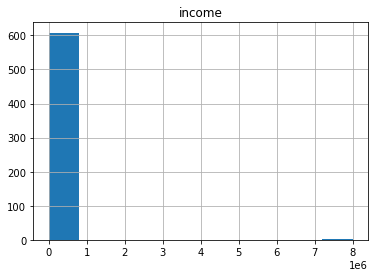

In [68]:
df_final4.hist(column='income')

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

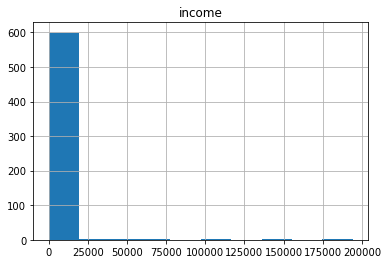

In [69]:
df_var_income_ol = df_final4[df_final4['income']<1*(10**6)]
df_var_income_ol.hist(column='income')

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

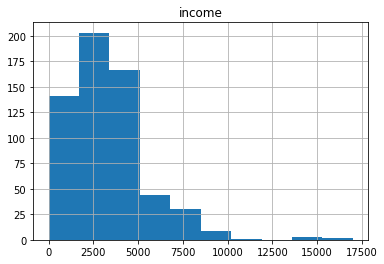

In [70]:
# right-skewed distribution

df_var_income_ol2 = df_final4[df_final4['income']<20000]
df_var_income_ol2.hist(column='income')

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

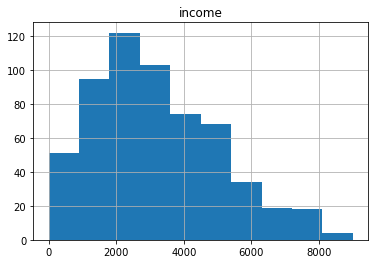

In [71]:
df_var_income_ol3 = df_final4[df_final4['income']<10000]

df_var_income_ol3.hist(column='income')

In [72]:
# high income class, outliers of more than EUR 10,000 net monthly income will be omitted

df_final5 = df_final4[df_final4['income']<10000]
df_final5.sort_values(by=['income'], ascending=False).head()

,no_cars,gender,age,income,political_party,education,postal_code,EUROSTAT,RLK2022,KTU2022,federal_state,NUTS2_NAME,NUTS3_NAME,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,belief_diff_housing_electricity,belief_diff_mobility,belief_diff_food,belief_diff_other_consumption,belief_diff_total
673,1.00,Weiblich,27,9000.00,FDP,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",80805,PU,sehr zentral,kreisfreie Großstadt,Bayern,Oberbayern,"München, Kreisfreie Stadt",1694.96,487.50,2182.46,0.00,9992.40,107.80,143.27,0.00,0.00,0.00,0.00,143.27,10243.47,1536.46,4334.64,1152.00,19449.03,42.00,45.00,25.00,17.00,9.00,160.00,77.00,393.00,19.00,63.00,26.00,12.00,64.00,3.00,10.00,-16.00,-33.00,39.00,-14.00,1.00
579,0.00,Weiblich,34,9000.00,Einer anderen Partei,Realschulabschluss (Mittlere Reife) oder gleic...,10557,PU,sehr zentral,kreisfreie Großstadt,Berlin,Berlin,Berlin,643.08,487.50,1130.58,0.00,3433.00,107.80,0.00,0.00,0.00,0.00,0.00,0.00,3540.80,1680.20,4334.64,1152.00,11838.21,80.00,37.00,20.00,30.00,89.00,421.00,286.00,331.00,19.00,232.00,69.00,47.00,54.00,3.00,38.00,-11.00,10.00,34.00,-27.00,-51.00
471,1.00,Weiblich,42,8500.00,Bündnis 90/Die Grünen,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",81375,PU,sehr zentral,kreisfreie Großstadt,Bayern,Oberbayern,"München, Kreisfreie Stadt",796.12,409.50,1205.62,0.00,1720.00,107.80,1253.64,0.00,0.00,0.00,0.00,1253.64,3081.44,1410.45,2607.30,1152.00,9456.81,60.00,40.00,65.00,40.00,59.00,397.00,321.00,462.00,221.00,359.00,65.00,52.00,75.00,36.00,58.00,5.00,12.00,10.00,-4.00,-1.00
294,3.00,Weiblich,22,8500.00,FDP,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",46562,PU,sehr zentral,Städtischer Kreis,Nordrhein-Westfalen,Düsseldorf,Wesel,867.96,455.00,1322.96,0.00,3238.00,0.00,1790.91,0.00,0.00,0.00,0.00,1790.91,5028.91,2539.31,3689.00,1152.00,13732.18,65.00,46.00,14.00,37.00,26.00,355.00,199.00,58.00,54.00,149.00,58.00,32.00,9.00,9.00,24.00,-7.00,-14.00,-5.00,-28.00,-2.00
634,1.00,Weiblich,19,8000.00,Bündnis 90/Die Grünen,Allgemeine oder fachgebundene Hochschulreife/A...,72124,IN,zentral,Städtischer Kreis,Baden-Württemberg,Tübingen,Reutlingen,7.35,366.60,373.95,0.00,1126.00,107.80,1855.01,0.00,0.00,0.00,0.00,1855.01,3088.81,971.33,2027.90,1152.00,7613.99,35.00,25.00,83.00,67.00,57.00,571.00,319.00,596.00,363.00,488.00,93.00,52.00,97.00,59.00,79.00,58.00,27.00,14.00,-8.00,22.00


In [73]:
df_final5.sort_values(by=['income'], ascending=True).head(30)

,no_cars,gender,age,income,political_party,education,postal_code,EUROSTAT,RLK2022,KTU2022,federal_state,NUTS2_NAME,NUTS3_NAME,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,belief_diff_housing_electricity,belief_diff_mobility,belief_diff_food,belief_diff_other_consumption,belief_diff_total
102,1.00,Männlich,47,0.00,Einer anderen Partei,"Berufsausbildung, Lehre oder Ausbildung an ein...",74594,PR,peripher,Ländlicher Kreis mit Verdichtungsansätzen,Baden-Württemberg,Stuttgart,Schwäbisch Hall,104.22,33.60,137.82,0.00,0.00,0.00,4667.06,0.00,0.00,0.00,0.00,4667.06,4667.06,1814.44,2201.72,1152.00,9973.04,30.00,30.00,25.00,60.00,50.00,589.00,221.00,262.00,313.00,329.00,96.00,36.00,43.00,51.00,54.00,66.00,6.00,18.00,-9.00,4.00
222,1.00,Weiblich,68,0.00,SPD,Allgemeine oder fachgebundene Hochschulreife/A...,44795,PU,sehr zentral,kreisfreie Großstadt,Nordrhein-Westfalen,Arnsberg,"Bochum, Kreisfreie Stadt",1838.20,487.50,2325.70,0.00,0.00,0.00,1790.91,0.00,0.00,0.00,0.00,1790.91,1790.91,2347.58,1596.97,1152.00,9213.16,46.00,38.00,70.00,74.00,69.00,143.00,405.00,91.00,434.00,375.00,23.00,66.00,15.00,71.00,61.00,-23.00,28.00,-55.00,-3.00,-8.00
463,3.00,Männlich,23,0.00,Die Linke,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",71334,PU,sehr zentral,Städtischer Kreis,Baden-Württemberg,Stuttgart,Rems-Murr-Kreis,432.32,455.00,887.32,0.00,532.00,107.80,1790.91,1790.91,1855.01,0.00,0.00,5436.83,6076.63,1530.07,1155.90,1152.00,10801.92,39.00,61.00,67.00,73.00,62.00,488.00,156.00,401.00,563.00,285.00,79.00,25.00,65.00,92.00,46.00,40.00,-36.00,-2.00,19.00,-16.00
213,2.00,Männlich,58,0.00,CDU/CSU,Realschulabschluss (Mittlere Reife) oder gleic...,97070,IN,zentral,kreisfreie Großstadt,Bayern,Unterfranken,"Würzburg, Kreisfreie Stadt",1196.20,468.00,1664.20,0.00,2096.00,107.80,4637.52,2686.36,0.00,0.00,0.00,7323.89,9527.69,2980.92,1216.74,1152.00,16541.55,35.00,20.00,5.00,10.00,16.00,261.00,93.00,27.00,548.00,100.00,42.00,15.00,4.00,89.00,16.00,7.00,-5.00,-1.00,79.00,0.00
525,0.00,Männlich,21,0.00,CDU/CSU,Allgemeine oder fachgebundene Hochschulreife/A...,64409,PU,sehr zentral,Städtischer Kreis,Hessen,Darmstadt,Darmstadt-Dieburg,1400.40,455.00,1855.40,0.00,0.00,107.80,0.00,0.00,0.00,0.00,0.00,0.00,107.80,1865.10,1098.11,1152.00,6078.41,72.00,74.00,61.00,66.00,81.00,213.00,540.00,240.00,581.00,565.00,35.00,88.00,39.00,95.00,92.00,-37.00,14.00,-22.00,29.00,11.00
98,2.00,Männlich,23,0.00,FDP,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",76593,IN,zentral,Städtischer Kreis,Baden-Württemberg,Karlsruhe,Rastatt,34.74,0.03,34.77,0.00,532.00,107.80,0.18,0.18,0.00,0.00,0.00,0.36,640.16,1513.78,2317.60,1152.00,5658.31,47.00,46.00,19.00,50.00,42.00,614.00,498.00,409.00,265.00,583.00,100.00,81.00,67.00,43.00,95.00,53.00,35.00,48.00,-7.00,53.00
582,0.00,Weiblich,25,0.00,Bündnis 90/Die Grünen,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",35037,IN,zentral,Ländlicher Kreis mit Verdichtungsansätzen,Hessen,Gießen,Marburg-Biedenkopf,1181.16,455.00,1636.16,0.00,532.00,107.80,0.00,0.00,0.00,0.00,0.00,0.00,639.80,1421.14,1100.86,1152.00,5949.96,69.00,79.00,54.00,60.00,73.00,264.00,499.00,456.00,574.00,572.00,43.00,82.00,74.00,93.00,93.00,-26.00,3.00,20.00,33.00,20.00
591,2.00,Männlich,21,0.00,Bündnis Sarah Wagenknecht,Allgemeine oder fachgebundene Hochschulreife/A...,75031,IN,zentral,Städtischer Kreis,Baden-Württemberg,Stuttgart,"Heilbronn, Landkreis",518.46,455.00,973.46,0.00,266.00,107.80,895.46,895.46,0.00,0.00,0.00

In [74]:
len(df_final5)

588

In [75]:
df_final5.columns

Index(['no_cars', 'gender', 'age', 'income', 'political_party', 'education',
       'postal_code', 'EUROSTAT', 'RLK2022', 'KTU2022', 'federal_state',
       'NUTS2_NAME', 'NUTS3_NAME', 'CO2_housing', 'CO2_electricity',
       'CO2_housing_electricity', 'CO2_cruise', 'CO2_flight',
       'CO2_public_transport', 'CO2_car1', 'CO2_car2', 'CO2_car3', 'CO2_car4',
       'CO2_car5', 'CO2_car_total', 'CO2_mobility', 'CO2_food',
       'CO2_other_consumption', 'public_emission', 'CO2_total',
       'belief_housing_electricity', 'belief_mobility', 'belief_food',
       'belief_other_consumption', 'belief_total',
       'actual_rank_CO2_housing_electricity1', 'actual_rank_CO2_mobility1',
       'actual_rank_CO2_food1', 'actual_rank_CO2_other_consumption1',
       'actual_rank_CO2_total1', 'actual_rank_CO2_housing_electricity2',
       'actual_rank_CO2_mobility2', 'actual_rank_CO2_food2',
       'actual_rank_CO2_other_consumption2', 'actual_rank_CO2_total2',
       'belief_diff_housing_electricity

In [76]:
### Columns in the final data for R
df_final_save = df_final5[['age', 'income', 'political_party', 'education', 
                     'EUROSTAT', 'RLK2022', 'KTU2022', 'federal_state',
                     'CO2_housing', 'CO2_electricity', 'CO2_housing_electricity', 'CO2_cruise', 'CO2_flight', 'CO2_public_transport', 'CO2_car1', 'CO2_car2',
       'CO2_car3', 'CO2_car4', 'CO2_car5', 'CO2_car_total', 'CO2_mobility',
       'CO2_food', 'CO2_other_consumption', 'public_emission', 'CO2_total', 
                          'belief_diff_housing_electricity', 'belief_diff_mobility',
       'belief_diff_food', 'belief_diff_other_consumption',
       'belief_diff_total']]

In [77]:
df_final_save.head()

,age,income,political_party,education,EUROSTAT,RLK2022,KTU2022,federal_state,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_diff_housing_electricity,belief_diff_mobility,belief_diff_food,belief_diff_other_consumption,belief_diff_total
25,65,3000.00,CDU/CSU,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",PU,zentral,Städtischer Kreis,Saarland,5038.20,1053.00,6091.20,0.00,2440.00,0.00,1432.73,0.00,0.00,0.00,0.00,1432.73,3872.73,1494.63,3766.10,1152.00,16376.66,-31.00,-14.00,5.00,-68.00,-15.00
26,59,800.00,Keine Angabe,Allgemeine oder fachgebundene Hochschulreife/A...,PU,sehr zentral,kreisfreie Großstadt,Hessen,1785.00,487.50,2272.50,2710.00,5985.00,107.80,1944.61,1037.12,0.00,0.00,0.00,2981.73,11784.53,1731.02,1444.88,1152.00,18384.93,-38.00,-42.00,-26.00,23.00,-76.00
27,60,1750.00,Keine Angabe,"Berufsausbildung, Lehre oder Ausbildung an ein...",IN,peripher,Ländlicher Kreis mit Verdichtungsansätzen,Bayern,200.10,663.00,863.10,0.00,598.50,107.80,0.00,0.00,0.00,0.00,0.00,0.00,706.30,1180.24,2433.48,1152.00,6335.12,40.00,11.00,49.00,9.00,57.00
28,73,2500.00,SPD,Realschulabschluss (Mittlere Reife) oder gleic...,IN,sehr zentral,Städtischer Kreis,Bayern,648.48,975.00,1623.48,0.00,2287.60,0.00,1432.73,0.00,0.00,0.00,0.00,1432.73,3720.33,1709.01,4152.13,1152.00,12356.94,-2.00,-31.00,-9.00,-36.00,-8.00
30,43,2500.00,Einer anderen Partei,"Berufsausbildung, Lehre oder Ausbildung an ein...",PU,sehr zentral,kreisfreie Großstadt,Berlin,1923.49,390.00,2313.49,0.00,0.00,107.80,0.00,0.00,0.00,0.00,0.00,0.00,107.80,1735.13,3766.10,1152.00,9074.52,-43.00,-2.00,-26.00,-53.00,-1.00


In [78]:
### save the cleaned data for Regression

df_final_save.to_csv('data_cleaned_R_final.csv')

In [79]:
#### Continue with the exploratory data analysis with: df_final2

df_final5.head()

,no_cars,gender,age,income,political_party,education,postal_code,EUROSTAT,RLK2022,KTU2022,federal_state,NUTS2_NAME,NUTS3_NAME,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,belief_diff_housing_electricity,belief_diff_mobility,belief_diff_food,belief_diff_other_consumption,belief_diff_total
25,1.00,Weiblich,65,3000.00,CDU/CSU,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",66440,PU,zentral,Städtischer Kreis,Saarland,Saarland,Saarpfalz-Kreis,5038.20,1053.00,6091.20,0.00,2440.00,0.00,1432.73,0.00,0.00,0.00,0.00,1432.73,3872.73,1494.63,3766.10,1152.00,16376.66,33.00,57.00,63.00,75.00,32.00,11.00,263.00,420.00,43.00,105.00,2.00,43.00,68.00,7.00,17.00,-31.00,-14.00,5.00,-68.00,-15.00
26,2.00,Weiblich,59,800.00,Keine Angabe,Allgemeine oder fachgebundene Hochschulreife/A...,65933,PU,sehr zentral,kreisfreie Großstadt,Hessen,Darmstadt,"Frankfurt am Main, Kreisfreie Stadt",1785.00,487.50,2272.50,2710.00,5985.00,107.80,1944.61,1037.12,0.00,0.00,0.00,2981.73,11784.53,1731.02,1444.88,1152.00,18384.93,62.00,52.00,75.00,55.00,88.00,149.00,62.00,302.00,477.00,76.00,24.00,10.00,49.00,78.00,12.00,-38.00,-42.00,-26.00,23.00,-76.00
27,0.00,Weiblich,60,1750.00,Keine Angabe,"Berufsausbildung, Lehre oder Ausbildung an ein...",95028,IN,peripher,Ländlicher Kreis mit Verdichtungsansätzen,Bayern,Oberfranken,"Hof, Kreisfreie Stadt",200.10,663.00,863.10,0.00,598.50,107.80,0.00,0.00,0.00,0.00,0.00,0.00,706.30,1180.24,2433.48,1152.00,6335.12,40.00,70.00,42.00,30.00,32.00,491.00,495.00,558.00,242.00,546.00,80.00,81.00,91.00,39.00,89.00,40.00,11.00,49.00,9.00,57.00
28,1.00,Männlich,73,2500.00,SPD,Realschulabschluss (Mittlere Reife) oder gleic...,63741,IN,sehr zentral,Städtischer Kreis,Bayern,Unterfranken,"Aschaffenburg, Kreisfreie Stadt",648.48,975.00,1623.48,0.00,2287.60,0.00,1432.73,0.00,0.00,0.00,0.00,1432.73,3720.33,1709.01,4152.13,1152.00,12356.94,45.00,75.00,60.00,40.00,40.00,267.00,271.00,315.00,25.00,200.00,43.00,44.00,51.00,4.00,32.00,-2.00,-31.00,-9.00,-36.00,-8.00
30,0.00,Männlich,43,2500.00,Einer anderen Partei,"Berufsausbildung, Lehre oder Ausbildung an ein...",13059,PU,sehr zentral,kreisfreie Großstadt,Berlin,Berlin,Berlin,1923.49,390.00,2313.49,0.00,0.00,107.80,0.00,0.00,0.00,0.00,0.00,0.00,107.80,1735.13,3766.10,1152.00,9074.52,66.00,90.00,75.00,60.00,63.00,145.00,540.00,300.00,43.00,384.00,23.00,88.00,49.00,7.00,62.00,-43.00,-2.00,-26.00,-53.00,-1.00


In [81]:
df_final5.to_csv('data_cleaned_descriptive_analysis_final.csv')